[Link to Dementia Dataset](https://data.mendeley.com/datasets/tsy6rbc5d4/1)

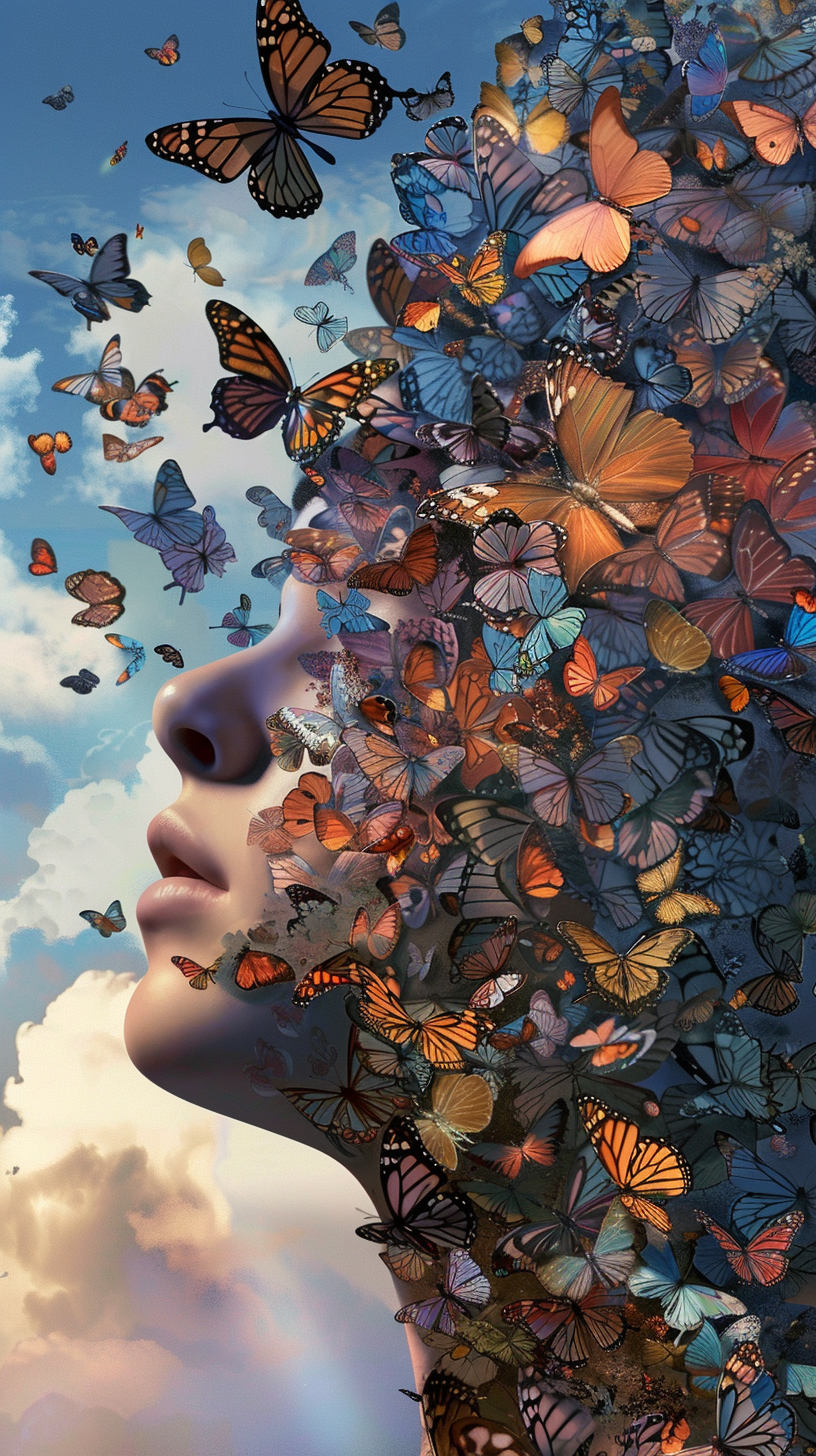

# Context
Dementia is a syndrome often chronic or progressive in nature, wherein the deterioration of cognitive function (i.e., thinking ability) exceeds the expected range of normal aging. It affects memory, thinking, orientation, comprehension, calculation, learning capacity, language, and judgment. Consciousness remains unaffected. Damage to cognitive function is typically accompanied by worsening of emotional control, social behavior, or motivation, sometimes even preceding them.

Dementia is caused by a variety of diseases and injuries that primarily or secondarily affect the brain, such as Alzheimer's disease or stroke.

Dementia is one of the leading causes of disability and dependency among older people worldwide. This can be overwhelming for those affected by the condition, their caregivers, and families. Insufficient awareness and understanding of dementia often lead to stigmatization and barriers in diagnosis and care. The impact of dementia on caregivers, families, and society as a whole can be physical, psychological, social, and economic.

# Content
The dataset includes 150 subjects aged between 60 and 96 years, collected over a long period. Each subject underwent at least two scans, separated by at least one year, totaling 373 image scans. For each subject, 3 or 4 separate T1-weighted MRI scans obtained in a single scan session were included. The subjects were all right-handed and included both males and females. Among these subjects, 72 were determined to be dementia-free throughout the study, 64 were determined to have dementia at the initial visit and maintained this status in subsequent scans, including 51 individuals with mild to moderate Alzheimer's disease. Additionally, 14 subjects were initially determined to be dementia-free but later diagnosed with dementia in subsequent visits.

# Acknowledgments
Battineni, Gopi; Amenta, Francesco; Chintalapudi, Nalini (2019), “Data for: MACHINE LEARNING IN MEDICINE: CLASSIFICATION AND PREDICTION OF DEMENTIA BY SUPPORT VECTOR MACHINES (SVM)”, Mendeley Data, V1, doi: 10.17632/tsy6rbc5d4.1

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

**In data science,** we utilize various tools to manipulate and analyze data. When we want to read data from a CSV file, we typically use specific tools or programs to accomplish this task. In this example, **pd.read_csv** signifies that we are using the pandas library in Python to read **a CSV file**. This function loads the data from the CSV file into our Python program, allowing us to analyze and manipulate it. In essence, pd.read_csv is a method used to read data from a CSV file and place it into our data analysis tool so that we can perform subsequent operations and analysis on it.

When working with data, you may encounter situations where you need to transform certain values to facilitate analysis. In this example, we see a column named **'M/F'**, which may contain **'M' and 'F'** as values, representing males and females. However, for some analytical tasks, it may be more convenient to use numbers for representation. For instance, we can convert 'M' to 1 to represent males and 'F' to 0 to represent females. Therefore, we use the .map() function to replace **'M' and 'F' with 1 and 0**. After doing so, the values in the 'M/F' column will be converted to numbers, making it easier for us to handle and understand in subsequent analysis.

In [ ]:
import pandas as pd

# Replace 'filename.csv' with the actual filename and extension of your dataset
file_path = r'E:\report\data\dementia_dataset(373).csv'

# Read the dataset
df = pd.read_csv(file_path)  # Use pd.read_excel() for Excel files, pd.read_json() for JSON files, etc.



# Replace 'M' and 'F' values with 1 and 0 respectively in the 'M/F' column
df['M/F'] = df['M/F'].map({'F': 0, 'M': 1})

In [ ]:
df=df.replace('Nondemented', 0).replace('Demented', 1).replace('Converted',2)

When you have a table with various data, you may sometimes find that some data is missing. This is similar to a book where some words on pages have disappeared.

Now, let's fill in these missing data:

1. For missing values in the 'SES' column, we will fill them with the most frequent value in that column. It's like when you're in a group of students, and many of them like to eat apples, so if someone forgets to tell you what fruit they like to eat, you might guess that they also like to eat apples.

2. For missing values in the 'MMSE' column, we will fill them with the mean of all values in that column. It's like when you have a group of students with varying ages, and you want to know the average age of the group. You add up the ages of each person and then divide by the number of people, giving you the average age.

In [ ]:
# Imputing missing values in the 'SES' column with the mode
df.SES.fillna(df.SES.mode()[0], inplace=True)

# Imputing missing values in the 'MMSE' column with the mean
df.MMSE.fillna(df.MMSE.mean(), inplace=True)

df.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

This operation will remove the columns named **'Subject ID', 'MRI ID', and 'Hand'** from the dataframe. These three columns may contain information that is not very important for our analysis work, so we have decided to remove them from the data.

Doing this will make our data more concise while retaining the information we need, making it easier for us to perform subsequent data analysis tasks.

In [ ]:
df1 = df.drop(['Subject ID', 'MRI ID', 'Hand'], axis=1)

Imagine you have a list of students in your class, and each student has different characteristics, like their favorite color or favorite subject. Now, let's say you want to **organize** this list in a way that makes it **easier to understand**.

So, you can create a new list for each characteristic. For example, you could have one list for favorite colors and another for favorite subjects. Then, you can put a checkmark next to each student's name to show their favorite color and subject.

Now, let's apply this idea to the data we're dealing with. "df1" is like our list of students, but instead of favorite colors and subjects, it's about different categories of information.

When we use "**pd.get_dummies(df1)**", it's like creating those separate lists for each category of information. It helps us **organize** the data so we can **understand** it better. Just like how we organized the list of students' characteristics, this helps us see the different categories of information more clearly.

In summary, using "**pd.get_dummies(df1)**" helps us **organize** our data into different groups, making it **easier to understand** and work with!

In [ ]:
df1= pd.get_dummies(df1)

In [ ]:
df1

Group  Visit  MR Delay  M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV  \
0        0      1         0    1   87    14  2.0  27.0  0.0  1987  0.696   
1        0      2       457    1   88    14  2.0  30.0  0.0  2004  0.681   
2        1      1         0    1   75    12  2.0  23.0  0.5  1678  0.736   
3        1      2       560    1   76    12  2.0  28.0  0.5  1738  0.713   
4        1      3      1895    1   80    12  2.0  22.0  0.5  1698  0.701   
..     ...    ...       ...  ...  ...   ...  ...   ...  ...   ...    ...   
368      1      2       842    1   82    16  1.0  28.0  0.5  1693  0.694   
369      1      3      2297    1   86    16  1.0  26.0  0.5  1688  0.675   
370      0      1         0    0   61    13  2.0  30.0  0.0  1319  0.801   
371      0      2       763    0   63    13  2.0  30.0  0.0  1327  0.796   
372      0      3      1608    0   65    13  2.0  30.0  0.0  1333  0.801   

       ASF  
0    0.883  
1    0.876  
2    1.046  
3    1.010  
4    1.034  
..     ...  
368  1.037  
369  1.040  
370  1.331  
371  1.323  
372  1.317  

[373 rows x 12 columns]

In [ ]:
# Drop duplicate rows based on 'Subject ID'
df.drop_duplicates(subset='Subject ID', inplace=True)

In [ ]:
display("Total rows in the dataset:", len(df))

'Total rows in the dataset:'

150

In [ ]:
df

Subject ID         MRI ID  Group  Visit  MR Delay  M/F Hand  Age  EDUC  \
0    OAS2_0001  OAS2_0001_MR1      0      1         0    1    R   87    14   
2    OAS2_0002  OAS2_0002_MR1      1      1         0    1    R   75    12   
5    OAS2_0004  OAS2_0004_MR1      0      1         0    0    R   88    18   
7    OAS2_0005  OAS2_0005_MR1      0      1         0    1    R   80    12   
10   OAS2_0007  OAS2_0007_MR1      1      1         0    1    R   71    16   
..         ...            ...    ...    ...       ...  ...  ...  ...   ...   
359  OAS2_0182  OAS2_0182_MR1      1      1         0    1    R   73    12   
361  OAS2_0183  OAS2_0183_MR1      0      1         0    0    R   66    13   
365  OAS2_0184  OAS2_0184_MR1      1      1         0    0    R   72    16   
367  OAS2_0185  OAS2_0185_MR1      1      1         0    1    R   80    16   
370  OAS2_0186  OAS2_0186_MR1      0      1         0    0    R   61    13   

     SES  MMSE  CDR  eTIV   nWBV    ASF  
0    2.0  27.0  0.0  1987  0.696  0.883  
2    2.0  23.0  0.5  1678  0.736  1.046  
5    3.0  28.0  0.0  1215  0.710  1.444  
7    4.0  28.0  0.0  1689  0.712  1.039  
10   2.0  28.0  0.5  1357  0.748  1.293  
..   ...   ...  ...   ...    ...    ...  
359  2.0  23.0  0.5  1661  0.698  1.056  
361  2.0  30.0  0.0  1495  0.746  1.174  
365  3.0  24.0  0.5  1354  0.733  1.296  
367  1.0  28.0  0.5  1704  0.711  1.030  
370  2.0  30.0  0.0  1319  0.801  1.331  

[150 rows x 15 columns]

In [ ]:
df.describe().T

count         mean         std       min       25%        50%  \
Group     150.0     0.613333    0.653197     0.000     0.000     1.0000   
Visit     150.0     1.000000    0.000000     1.000     1.000     1.0000   
MR Delay  150.0     0.000000    0.000000     0.000     0.000     0.0000   
M/F       150.0     0.413333    0.494081     0.000     0.000     0.0000   
Age       150.0    75.446667    7.545421    60.000    70.000    75.0000   
EDUC      150.0    14.533333    2.874714     6.000    12.000    14.0000   
SES       150.0     2.466667    1.103178     1.000     2.000     2.0000   
MMSE      150.0    27.560000    2.968470    17.000    26.000    29.0000   
CDR       150.0     0.260000    0.326256     0.000     0.000     0.0000   
eTIV      150.0  1474.426667  174.683889  1123.000  1347.250  1453.5000   
nWBV      150.0     0.736073    0.036458     0.660     0.710     0.7350   
ASF       150.0     1.206333    0.137864     0.883     1.121     1.2075   

                 75%       max  
Group        1.00000     2.000  
Visit        1.00000     1.000  
MR Delay     0.00000     0.000  
M/F          1.00000     1.000  
Age         80.00000    96.000  
EDUC        16.00000    23.000  
SES          3.00000     5.000  
MMSE        30.00000    30.000  
CDR          0.50000     1.000  
eTIV      1565.25000  1987.000  
nWBV         0.75775     0.837  
ASF          1.30275     1.563

**--------------------------------------------------------------------------------**


1. **Getting Ready**: We're going to look at some information about genders, like how many boys and girls there are.

2. **Counting Time**: First, we count how many boys and girls there are in total.

3. **Drawing a Picture**: Next, we draw a picture, kind of like a bar chart. We put two bars on it: one for boys and one for girls. The height of each bar shows how many boys or girls.

4. **Adding Labels**: We write "F" for girls and "M" for boys at the bottom of the chart so we know what each bar means. We also write numbers on top of each bar to show how many boys or girls there are.

5. **Looking at the Picture**: Finally, we look at our picture to see if there are more boys or girls. This helps us understand the information better.

So, in short, we're just counting how many boys and girls there are and showing it in a picture to make it easier to understand.


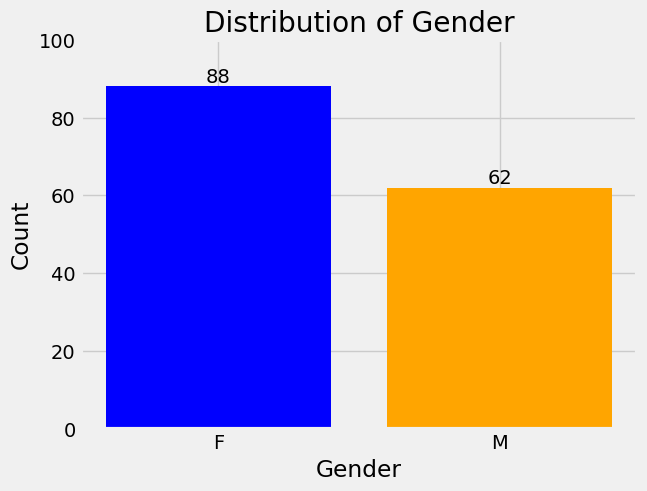

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in the 'M/F' column
gender_counts = df['M/F'].value_counts()

# Plot a histogram
plt.bar(['F', 'M'], gender_counts.values, color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Add value labels on top of each bar
for i, value in enumerate(gender_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.ylim(0,100)
# Show the plot
plt.show()

## Population Demographic Information:
1. **Subject ID**
2. **MRI ID**
3. **Group**
4. **Visit Count**
5. **MR Delay**
6. **Gender**
7. **Handedness**
9. **Education Level**
10. **Socioeconomic Status**


**--------------------------------------------------------------------------------**


1. **Getting Ready**: We have a bunch of information about different groups, like classrooms in a school. Each group has boys and girls.

2. **Making It Clearer**: At first, the information might be a little tricky because it uses numbers for boys and girls. But we change those numbers into letters: 'F' for girls and 'M' for boys.

3. **Counting Time**: We look at each group and count how many boys and girls are there.

4. **Drawing a Picture**: We draw a picture, like a bar chart, to show how many boys and girls are in each group. Each bar in the chart represents a group, and we color it to show how many boys and girls.

5. **Adding Labels**: We write words at the bottom (like the group names) and on the side (to show how many boys and girls) to help understand our picture.

6. **Making It Pretty**: We might change some things to make our picture look nice, like rotating the group names or using different colors for boys and girls.

7. **Adding Extras**: We might write little notes above each bar to say exactly how many boys and girls are in each group.

8. **Looking at the Picture**: Finally, we look at our picture to see which groups have more boys or girls. This helps us understand the information better.



- **0: Non-demented**
- **1: Demented**
- **2: Convert**

In the scatter plots and pair plots:
- Each point represents an individual.
- The color of the points represents the group they belong to.
- The legend indicates the mapping of **0**, **1**, and **2** to their corresponding categories: **'Non-demented'**, **'Demented'**, and **'Convert'**, respectively.

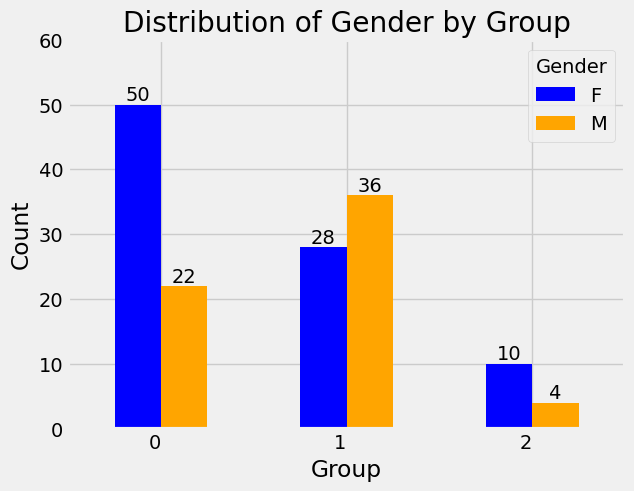

In [ ]:
import matplotlib.pyplot as plt

# Replace 0 with 'F' and 1 with 'M' in the 'M/F' column
df['M/F'] = df['M/F'].replace({0: 'F', 1: 'M'})

# Group the DataFrame by 'Group' and 'M/F' columns and count the occurrences
group_gender_counts = df.groupby(['Group', 'M/F']).size().unstack(fill_value=0)

# Plot a grouped bar chart
ax = group_gender_counts.plot(kind='bar', color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Distribution of Gender by Group')

# Rotate x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

# Add legend
plt.legend(title='Gender')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.ylim(0,60)
# Show the plot
plt.show()


1. **Age Distribution**: First, we want to know about the ages of people. We made a picture called a histogram. Each bar in the picture shows how many people are a certain age. The taller the bar, the more people of that age.

2. **Education Level**: Next, we want to understand how many years people went to school. We made another histogram picture. This time, each bar shows how many people went to school for a certain number of years.

3. **Socioeconomic Status (SES)**: Lastly, we want to understand what "socioeconomic status" (SES) means. We made one more histogram picture. Again, each bar shows how many people have a certain SES.

4. **Understanding the Pictures**: By looking at these pictures, we can learn things like how old people are, how many years they went to school, and what their SES is like. It helps us understand the information better.

So, we're just making pictures to see how old people are, how many years they went to school, and what their SES is like. It helps us learn more about them!


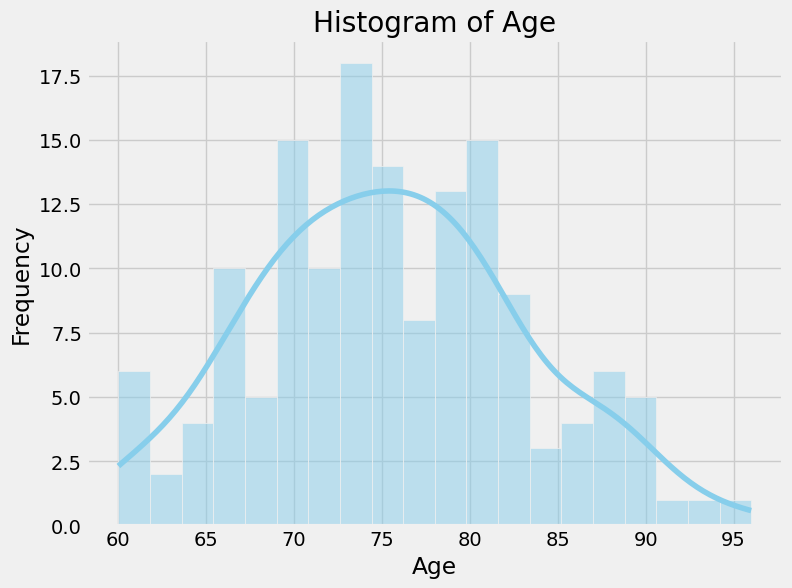

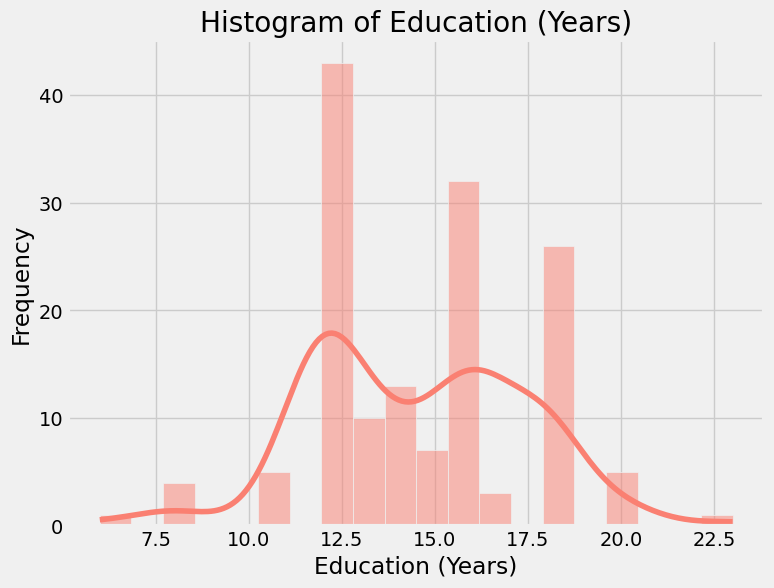

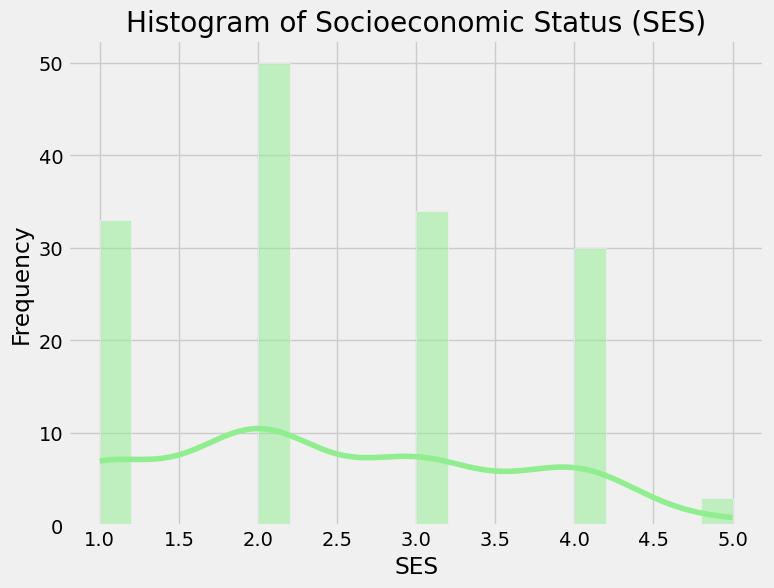

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only Age, Education (Educ), and Socioeconomic Status (SES) columns
age_educ_ses_df = df[['Age', 'EDUC', 'SES']]

# Plot histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(data=age_educ_ses_df, x='Age', kde=True, bins=20, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for Education
plt.figure(figsize=(8, 6))
sns.histplot(data=age_educ_ses_df, x='EDUC', kde=True, bins=20, color='salmon')
plt.title('Histogram of Education (Years)')
plt.xlabel('Education (Years)')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for SES
plt.figure(figsize=(8, 6))
sns.histplot(data=age_educ_ses_df, x='SES', kde=True, bins=20, color='lightgreen')
plt.title('Histogram of Socioeconomic Status (SES)')
plt.xlabel('SES')
plt.ylabel('Frequency')
plt.show()

1. **Relationship between Age and Education (EDUC)**: Usually, we might think older people have more education. But from the data, it's not so clear. Some younger people have lots of education, while some older ones have less.

2. **Relationship between Age and Socioeconomic Status (SES)**: We might think older people have more money and resources, but the data doesn't clearly show that. People of different ages have different SES.

3. **Relationship between Education (EDUC) and Socioeconomic Status (SES)**: We might guess that people who went to school longer have more money. But from the data, we see that even if someone went to school a lot, they might not always have more money.

Overall, from this data, we can't be sure about the relationships between age, education, and SES. There might be other factors affecting these relationships. We might need further research to understand it better.

We're visualizing data related to different groups in a study. Here's what each group represents:

- **0: Non-demented**
- **1: Demented**
- **2: Convert**

In the scatter plots and pair plots:
- Each point represents an individual.
- The color of the points represents the group they belong to.
- The legend indicates the mapping of **0**, **1**, and **2** to their corresponding categories: **'Non-demented'**, **'Demented'**, and **'Convert'**, respectively.


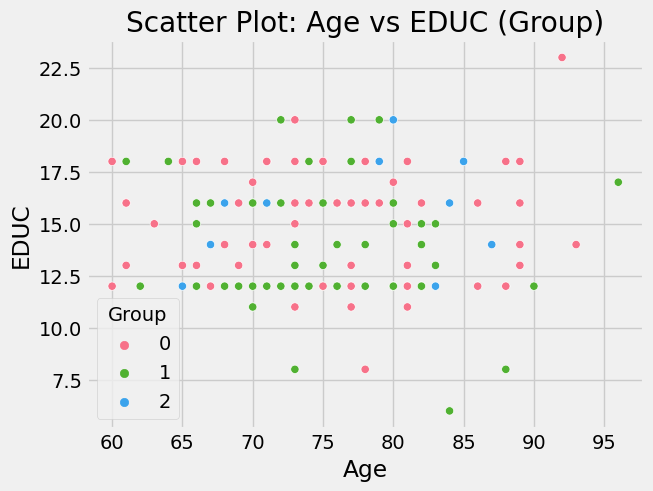

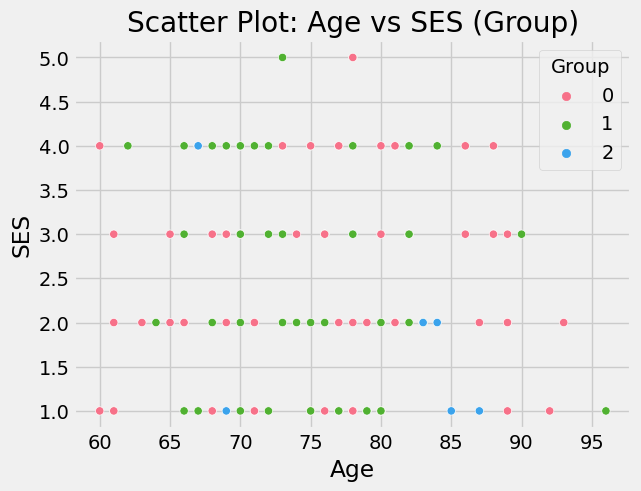

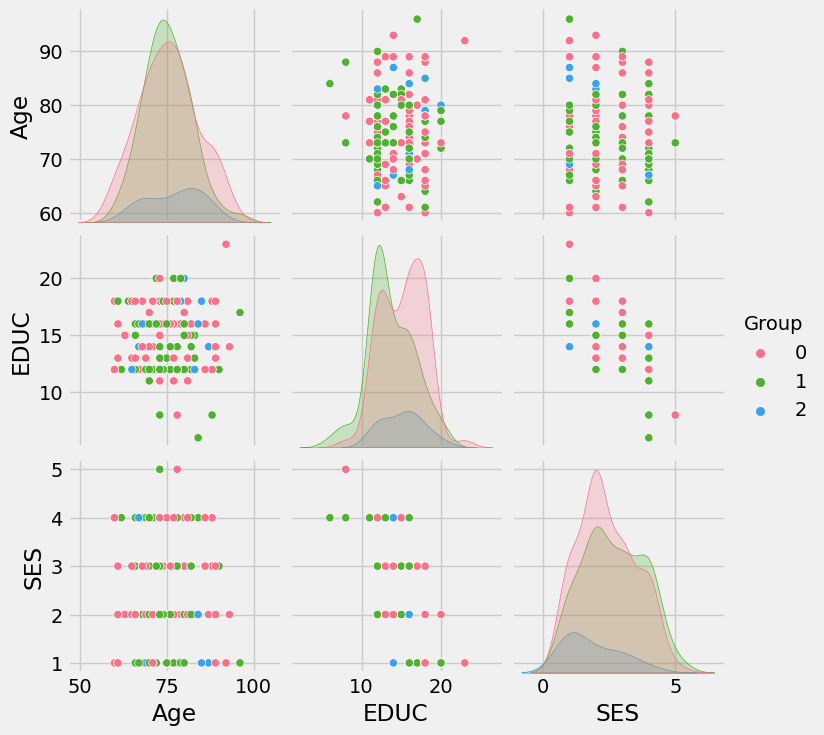

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set color palette for the plots
palette = sns.color_palette("husl", 3)

# Scatter plot: Age vs EDUC with hue by Group
sns.scatterplot(data=df, x='Age', y='EDUC', hue='Group', palette=palette)
plt.title('Scatter Plot: Age vs EDUC (Group)')
plt.xlabel('Age')
plt.ylabel('EDUC')
plt.show()

# Scatter plot: Age vs SES with hue by Group
sns.scatterplot(data=df, x='Age', y='SES', hue='Group', palette=palette)
plt.title('Scatter Plot: Age vs SES (Group)')
plt.xlabel('Age')
plt.ylabel('SES')
plt.show()

# Pair plot: Age, EDUC, SES with hue by Group
sns.pairplot(df[['Age', 'EDUC', 'SES', 'Group']], hue='Group', palette=palette)
plt.show()


**--------------------------------------------------------------------------------**

### Cognitive Assessment:

11. **Mini-Mental State Examination (MMSE)**

"Hi! So, the Mini-Mental State Examination, abbreviated as MMSE, is like a special test that can help doctors assess how well someone's brain is functioning. It's kind of like checking how smart you are when playing a game, but it's not a game; it's doctors asking questions and giving tasks.

For example, they might ask some **simple questions**, like 'What's your name?' or 'What day is it today?', or they might ask you to **remember a short phrase** and then say it back. They might also ask you to **copy a simple drawing** or **count backward from 10**.

By completing these tasks, doctors can understand how well your brain is working and if there are any issues that need further investigation. It's like going to the doctor for a routine check-up, but for your brain!

And remember, **it's okay if you don't know all the answers or if some things are a bit difficult**. **The important thing is that you do your best!**"


Mini-Mental State Examination (MMSE)'s full name can be found [here](https://orgws.kcg.gov.tw/001/KcgOrgUploadFiles/117/relfile/0/73016/d45b03ce-9569-4484-b51d-09e45ef02fd2.pdf).


**--------------------------------------------------------------------------------**

12. **Clinical Dementia Rating (CDR)**

"Hey, now let's talk about the Clinical Dementia Rating, abbreviated as CDR. This is like another test that doctors do, but this time it's about your memory and thinking.

So, the doctor will ask you some questions, maybe about your life and daily activities. They might ask if you can cook for yourself or remember what day of the week it is. They might also observe your behavior and mood to see if you're behaving as usual.

The doctor might also ask your family or caregivers some questions to understand your condition. Then, based on this information, they'll give you a score to assess your memory and thinking abilities.

It's like going to the doctor for a little test, but it's to make sure your brain and thoughts are healthy! Don't worry, it's just an assessment, and the doctor will help you do your best."


[**Clinical Dementia Rating (CDR)**](http://www.tds.org.tw/ap/download_view.aspx?bid=49&sn=be23071b-a648-4297-88a4-be6ed744563f) （CDR）

[**Clinical Dementia Rating (CDR)**](https://medium.com/gerls-physio/dementia3-56c85e3f967e) for more information.


**--------------------------------------------------------------------------------**

Based on the provided data, we can analyze the histograms of Mini-Mental State Examination (MMSE) and Clinical Dementia Rating (CDR) scores:

1. **Mini-Mental State Examination (MMSE) Histogram**:
   The MMSE histogram illustrates the distribution of cognitive function scores within the dataset. Each bar represents a range of MMSE scores, where **higher scores indicate better cognitive function**. The height of each bar indicates the frequency of individuals with corresponding score ranges. This histogram assists in evaluating the distribution of cognitive function levels within the study population and identifying any trends or patterns in cognitive performance.

2. **Clinical Dementia Rating (CDR) Histogram**:
   The CDR histogram displays the distribution of cognitive impairment severity within the dataset. Each bar represents different levels of cognitive impairment severity, where **higher CDR scores indicate more severe cognitive impairment**. The height of each bar indicates the frequency of individuals with corresponding CDR scores. This histogram provides insights into the prevalence of different levels of cognitive impairment severity within the study population.

These histograms offer valuable insights into the distribution of cognitive function levels and cognitive impairment severity within the study population, aiding in a better understanding of individuals' cognitive health status.

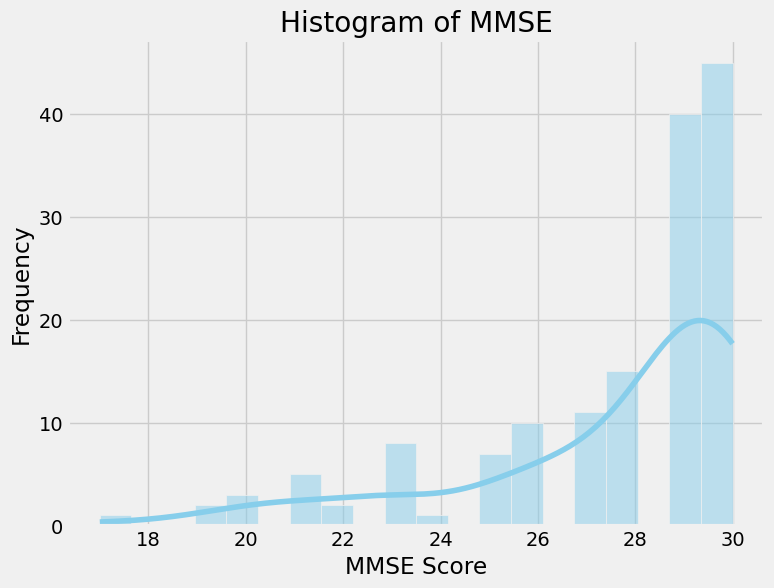

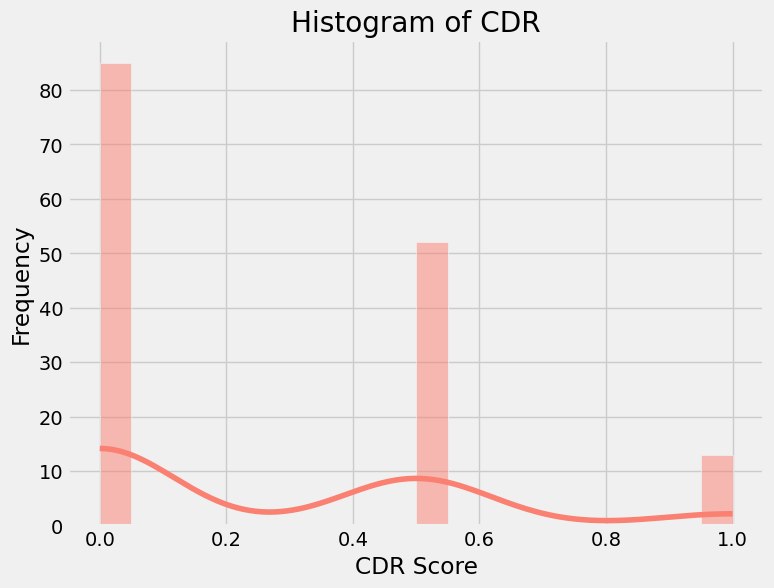

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only MMSE and CDR columns
mmse_cdr_df = df[['MMSE', 'CDR']]

# Plot histogram for MMSE
plt.figure(figsize=(8, 6))
sns.histplot(data=mmse_cdr_df, x='MMSE', kde=True, bins=20, color='skyblue')
plt.title('Histogram of MMSE')
plt.xlabel('MMSE Score')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for CDR
plt.figure(figsize=(8, 6))
sns.histplot(data=mmse_cdr_df, x='CDR', kde=True, bins=20, color='salmon')
plt.title('Histogram of CDR')
plt.xlabel('CDR Score')
plt.ylabel('Frequency')
plt.show()

### Neuroimaging Metrics:

13. **Estimated Total Intracranial Volume (eTIV)** is like measuring the size of the brain. It tells us how much space the brain occupies inside the skull. If there's a large space inside the skull, the brain may be larger; if the space is smaller, the brain may be smaller.

14. **Normalized Whole Brain Volume (nWBV)** is a way to measure the relative size of the brain. It tells us the size of the brain relative to the size of the entire skull. Sometimes the brain may be large, but its size relative to the skull may be different, and that's what normalized whole brain volume means.

15. **Atlas Scaling Factor (ASF)** tells us if the shape of the brain is normal. Sometimes the brain may be too flat or too long, which may mean its shape is off. ASF is like a ruler for measuring the shape of the brain.

These measurements help doctors understand the size, shape, and relative size of the brain, thereby better understanding our health condition.


**--------------------------------------------------------------------------------**

**Estimated Total Intracranial Volume (eTIV)** refers to the total volume inside the entire skull, encompassing the space occupied by the brain and other tissues.

When we talk about Estimated Total Intracranial Volume (eTIV), we are essentially discussing the size of the brain. The "estimated" part of this term implies that doctors use various methods and tools to estimate, while "total intracranial volume" refers to the total volume inside the entire brain.

Doctors may employ different methods to measure the brain, such as through magnetic resonance imaging (MRI) or other imaging techniques. Through these techniques, they can visualize various parts of the brain and calculate their sizes. By conducting these measurements, they can arrive at an approximate figure, namely the Estimated Total Intracranial Volume.

This is crucial for doctors because the size of the brain is related to many health factors. For instance, if someone's brain is smaller than average, it may indicate abnormal brain development or potential health issues. By understanding the size of the brain, doctors can better assess a person's health status and devise appropriate treatment plans.

For more information, you can refer to the research paper on Estimated Total Intracranial Volume [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7974589/).

**--------------------------------------------------------------------------------**

**Normalized Whole Brain Volume (nWBV)** refers to the proportion of brain volume within the total intracranial volume, typically measured through magnetic resonance imaging (MRI) of brain structures. Normalization involves dividing the brain volume by the Estimated Total Intracranial Volume (eTIV) to account for differences in size between individuals.

Normalized Whole Brain Volume (nWBV) can help doctors more accurately assess the health status of brain structures. For example, the proportion of normal brain tissue may be related to brain degeneration or other neurological disorders. This measurement method can be used to study changes in brain structure and their associations with various diseases and health conditions.

For more information, you can refer to the research paper on Normalized Whole Brain Volume [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2906402/).


**--------------------------------------------------------------------------------**

**Atlas Scaling Factor (ASF)** is an indicator of the proportion between an individual's brain structure and a standard brain template.

When we talk about the Atlas Scaling Factor, we are essentially discussing the similarity between an individual's brain structure and a standard brain template. Here, "Atlas" refers to a standard template of brain structure, and "Scaling Factor" indicates the proportion of an individual's brain structure relative to that template.

The calculation of ASF typically involves registering an individual's brain structure to a standard brain template and then determining the relative size between the two. This proportion provides information about the degree of difference between an individual's brain structure and the standard template.

ASF is crucial for studying variability in brain structure and differences between different populations. By comparing ASF values among individuals, we can better understand the diversity of brain structures and the relationship between these structural variations and factors such as health and disease.

For more information, you can refer to the research paper on Atlas Scaling Factor [here](https://pubmed.ncbi.nlm.nih.gov/15488422/).

**--------------------------------------------------------------------------------**

## Descriptive Analysis of Brain MRI Data

In this analysis, we explore the characteristics of brain MRI data, focusing on three key variables: Estimated Total Intracranial Volume (eTIV), Normalized Whole Brain Volume (nWBV), and Atlas Scaling Factor (ASF).

### Histograms

**1. Estimated Total Intracranial Volume (eTIV):**
   The histogram of eTIV displays a bell curve distribution, indicating that the majority of subjects have comparable intracranial volumes, with some outliers.

**2. Normalized Whole Brain Volume (nWBV):**
   The histogram of nWBV exhibits a sharper distribution with notable variability, suggesting differences in brain tissue density among subjects.

**3. Atlas Scaling Factor (ASF):**
   The histogram of ASF shows a relatively uniform distribution with a broader spread, reflecting variability in brain structural scaling among subjects.

### Scatterplots

Complementing the histograms, scatterplots depict the relationships between eTIV, nWBV, and ASF, offering insights into their interactions and associations.

Overall, these visualizations provide a comprehensive understanding of the characteristics and interrelations of eTIV, nWBV, and ASF within the dataset.

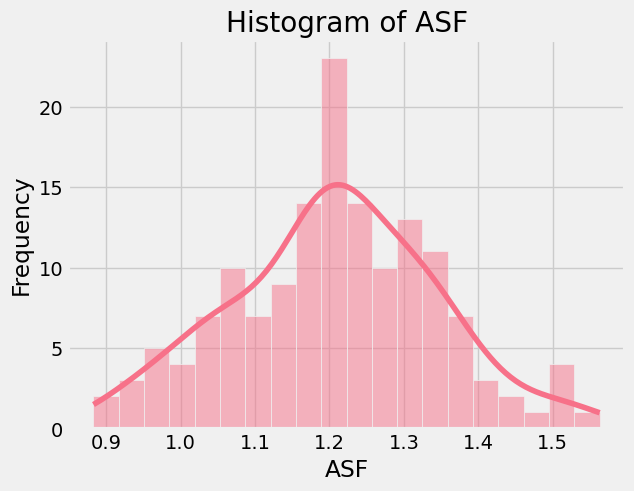

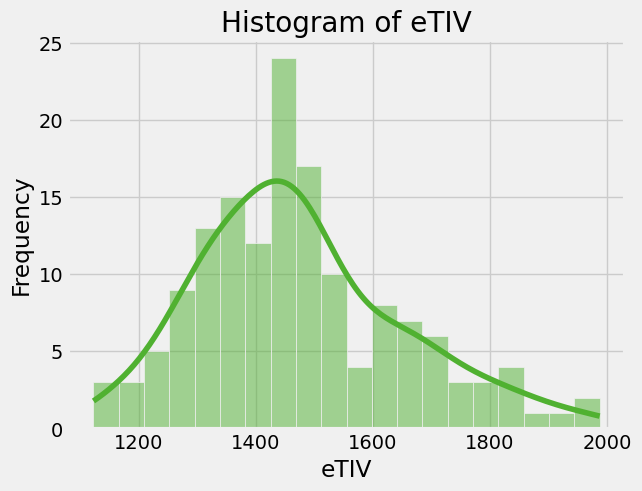

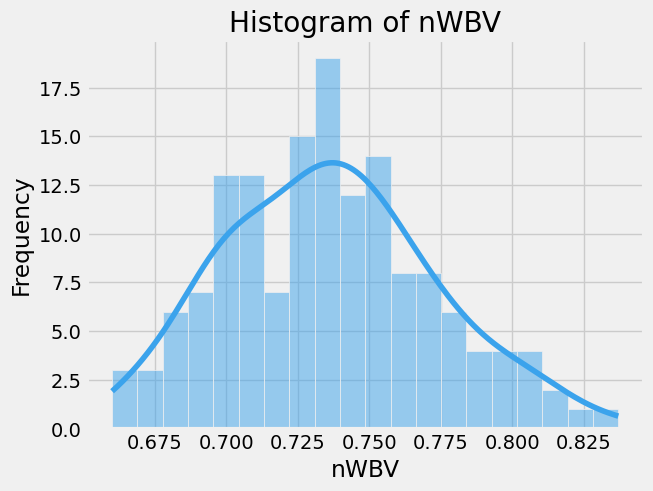

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set color palette for the plots
palette = sns.color_palette("husl", 3)

# Drop non-numeric columns if necessary
numeric_df = df.drop(columns=['Group', 'Subject ID', 'MRI ID', 'MR Delay'])

# Create histogram for ASF with different color
sns.histplot(data=numeric_df['ASF'], kde=True, bins=20, color=palette[0])
plt.title('Histogram of ASF')
plt.xlabel('ASF')
plt.ylabel('Frequency')
plt.show()

# Create histogram for eTIV with different color
sns.histplot(data=numeric_df['eTIV'], kde=True, bins=20, color=palette[1])
plt.title('Histogram of eTIV')
plt.xlabel('eTIV')
plt.ylabel('Frequency')
plt.show()

# Create histogram for nWBV with different color
sns.histplot(data=numeric_df['nWBV'], kde=True, bins=20, color=palette[2])
plt.title('Histogram of nWBV')
plt.xlabel('nWBV')
plt.ylabel('Frequency')
plt.show()



1. **Choosing Columns**: First, we pick out some columns from our table of data. These columns are about things like the size of different parts of our brain.

2. **Pairing Columns**: Next, we pair up each column with every other column, but not with itself. For example, we look at how the size of one part of the brain relates to the size of another part.

3. **Drawing Pictures**: Then, we draw a picture for each pair of columns. Each dot on the picture represents one person's brain. The dots are placed to show how the size of one part of the brain compares to the size of another part.

4. **Understanding the Pictures**: By looking at these pictures, we can learn things like whether the size of one part of the brain is related to the size of another part. This helps us understand how different parts of the brain might work together.

So, we're just making pictures to see if the size of one part of the brain is connected to the size of another part. It helps us learn more about how our brains work!


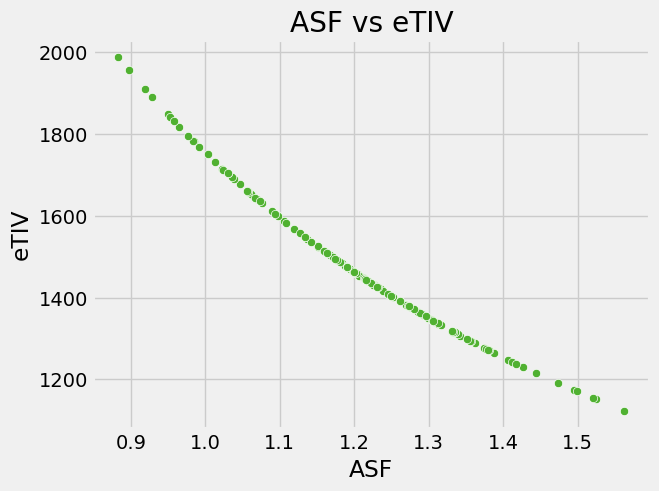

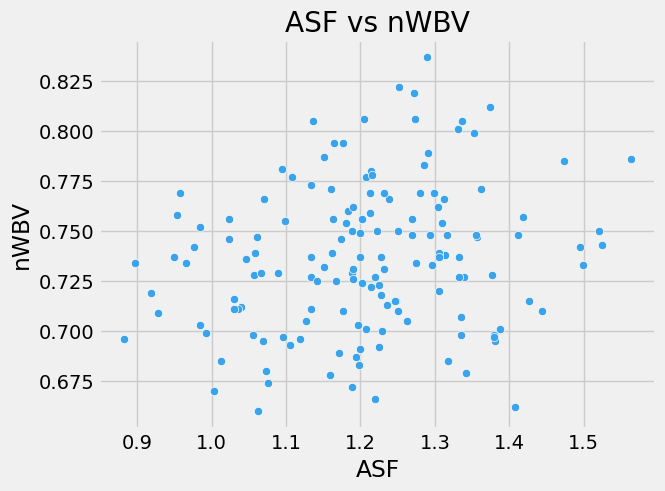

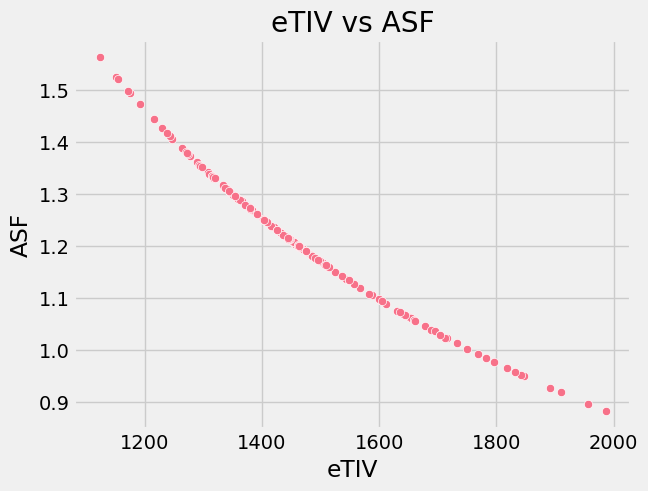

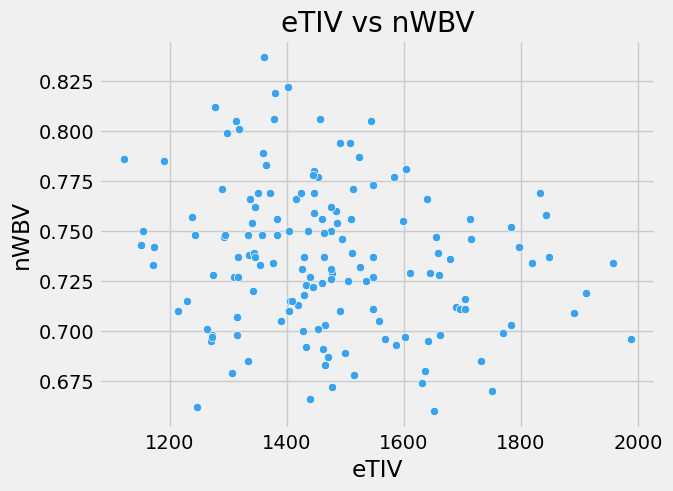

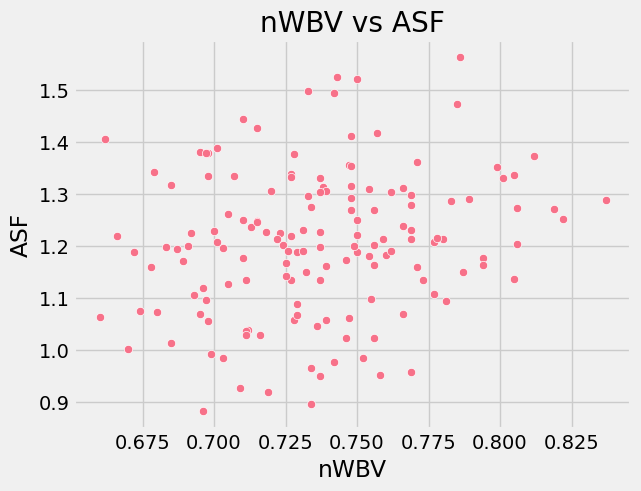

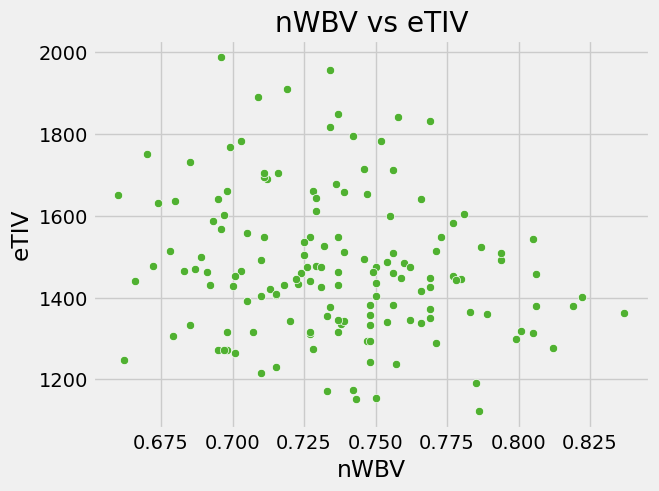

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set color palette for the plots
palette = sns.color_palette("husl", 3)

# Define the selected columns
selected_columns = ['ASF', 'eTIV', 'nWBV']

# Selecting only the specified columns
numeric_df_selected = df[selected_columns]

# Create pair plots for each pair of columns
for i, column1 in enumerate(selected_columns):
    for j, column2 in enumerate(selected_columns):
        if i != j:  # Exclude self-pairing
            sns.scatterplot(data=numeric_df_selected, x=column1, y=column2, color=palette[j])
            plt.xlabel(column1)
            plt.ylabel(column2)
            plt.title(f'{column1} vs {column2}')
            plt.show()


Imagine you have a big chart with lots of information about different students in your class. Now, let's say you want to see how some of this information is spread out, like how many students fall into different categories.

So, you can think of a histogram as a way to group the information into different bins or buckets and then count how many students are in each bin. For example, you can group students by their ages and see how many students are in each age group.

Now, let's apply this idea to the data we're working with. "`df1.hist(bins=20, figsize=(15, 15))`" is like making one of these histograms for our big chart of student data.

Here, "`df1`" is our big chart with all the student information. "`bins=20`" means we want to divide the data into 20 bins or groups, and "`figsize=(15, 15)`" just means we want the histogram to be a certain size.

So, when we run this code, it will show us a histogram that groups the student data into 20 bins and displays it in a plot that's 15 by 15 units in size. This can help us see how the student data is spread out and if there are any patterns or trends!

In summary, "`df1.hist(bins=20, figsize=(15, 15))`" helps us create a histogram to visualize how the student data is distributed across different categories, making it easier to spot any interesting trends or patterns!

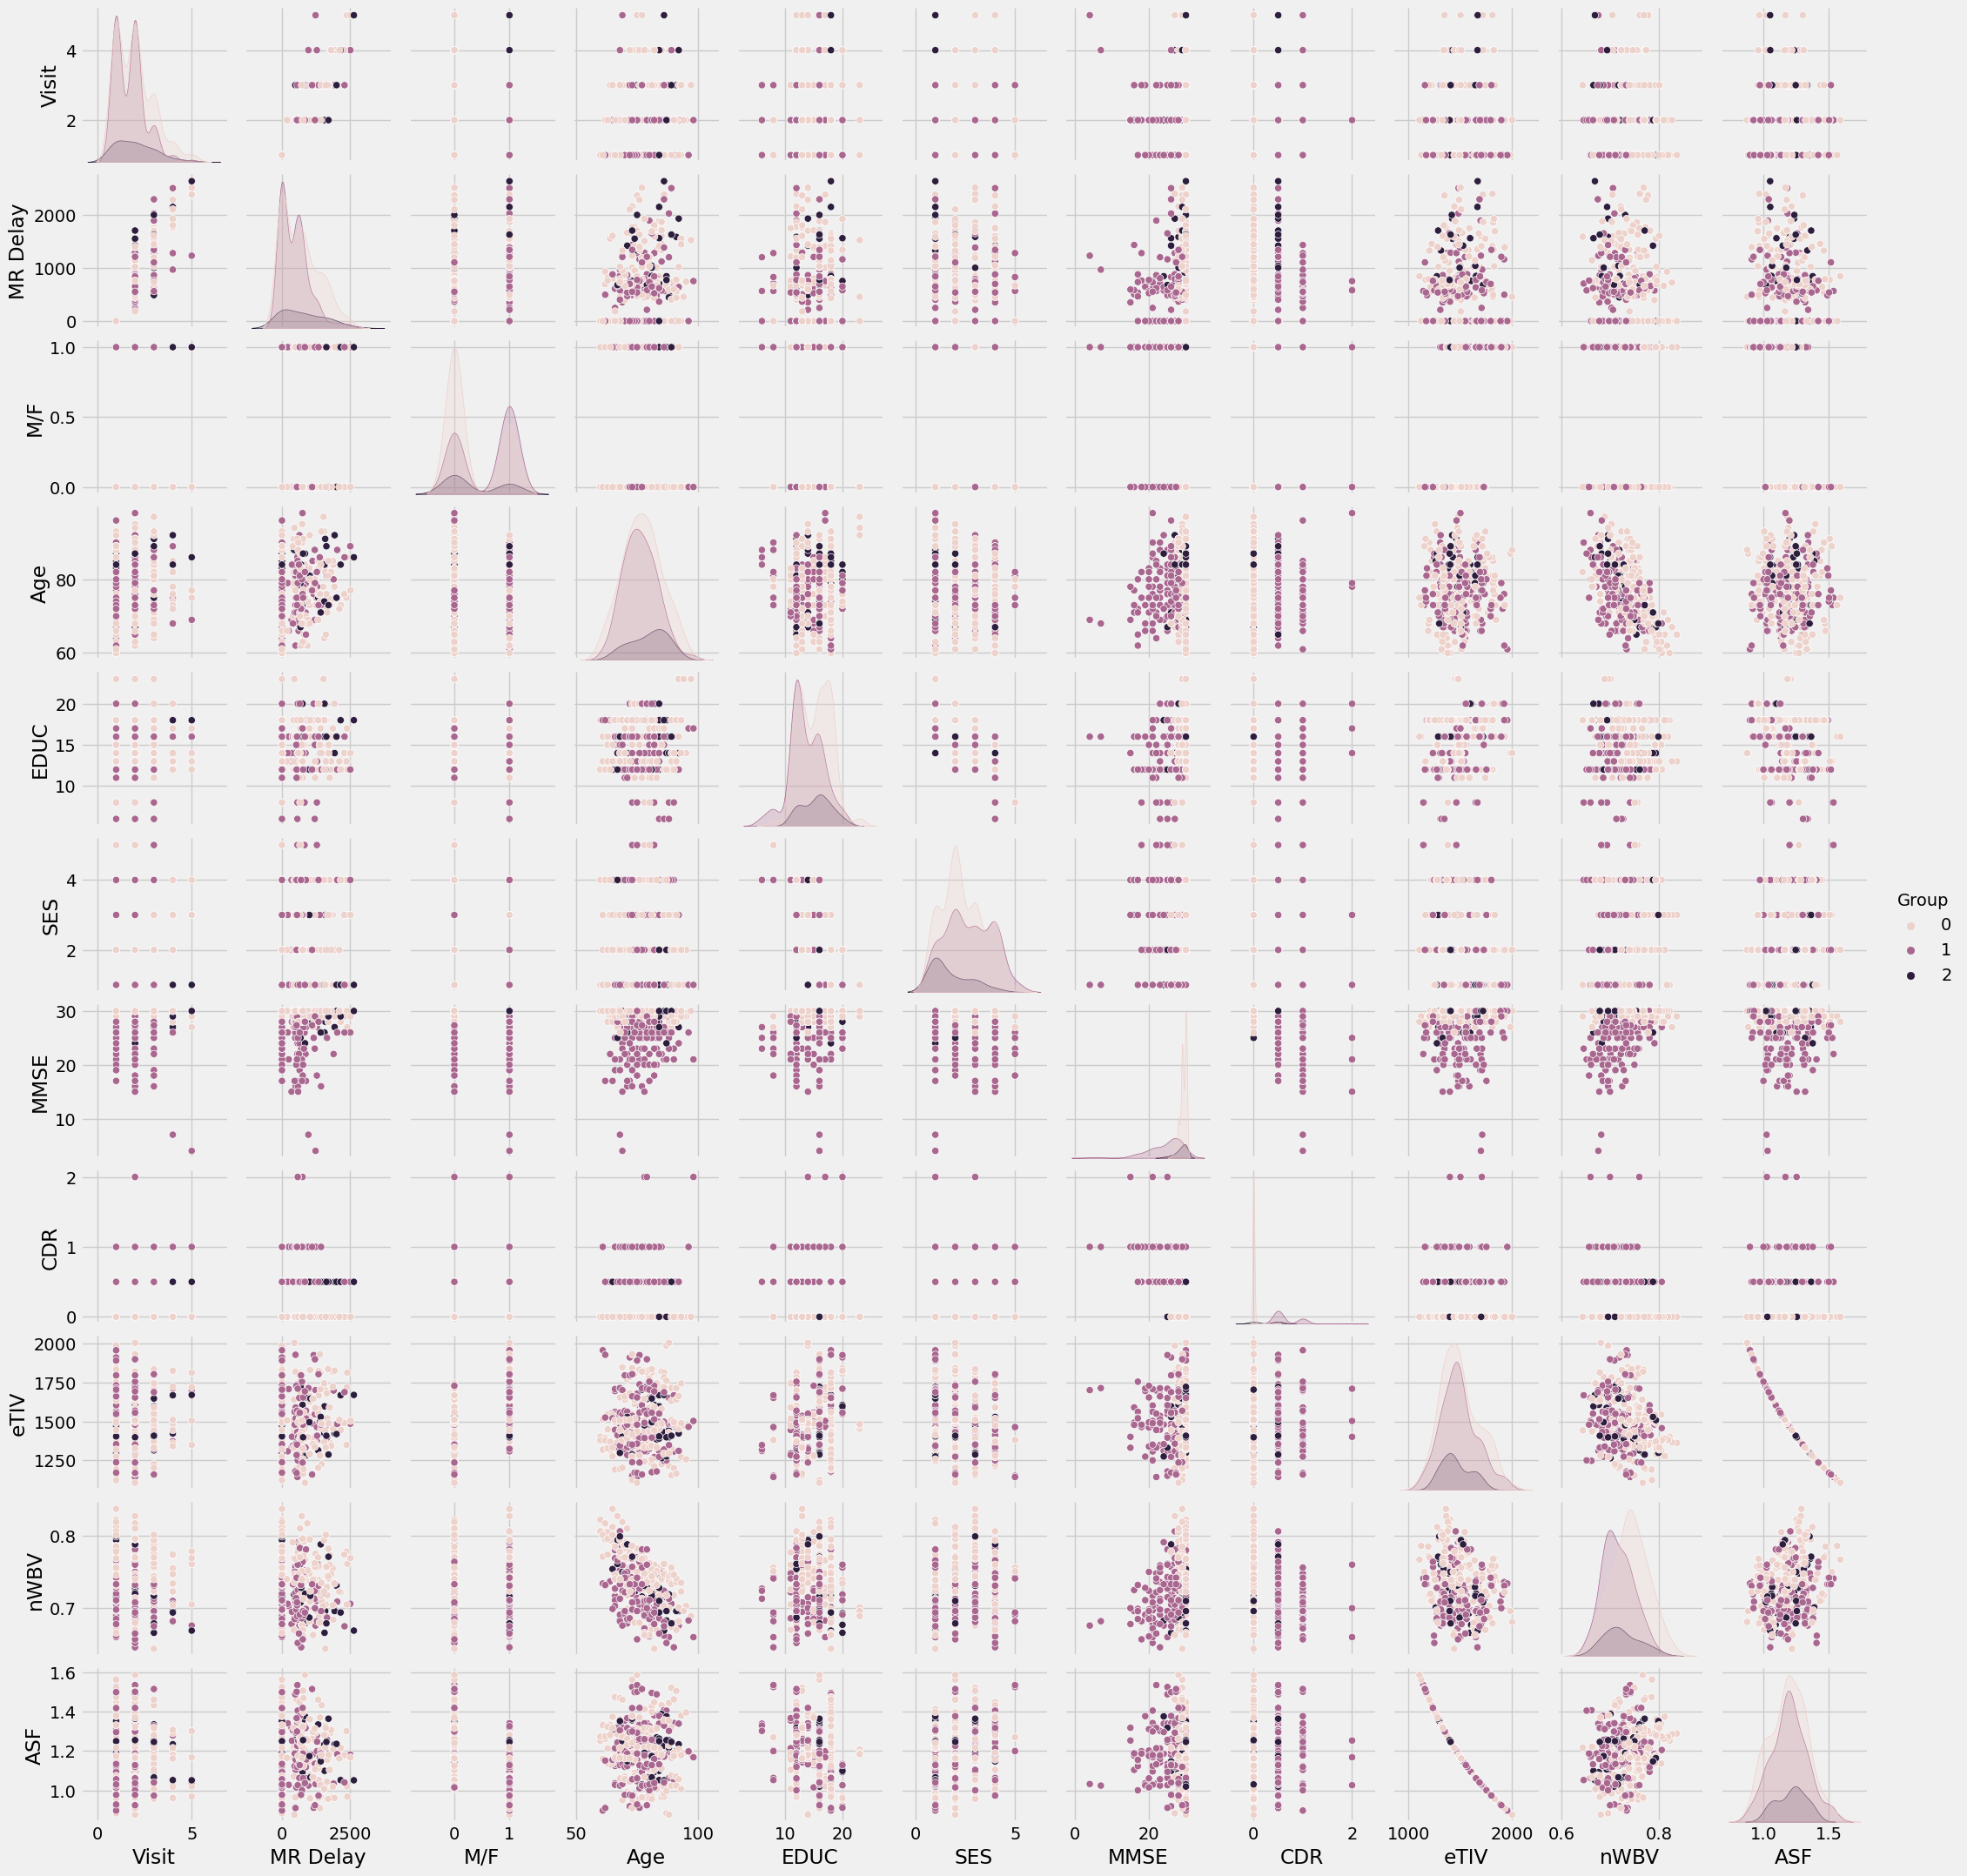

In [ ]:
sns.pairplot(df1,hue='Group',size=2)
plt.show()

This code snippet assumes we have a DataFrame named `df1`. It creates a canvas with a size of (15, 15) and then plots a **heatmap** on this canvas.

A **heatmap** visualizes the **correlation** between all numerical columns in the DataFrame. The color of each cell represents the degree of correlation, usually ranging from dark (high correlation) to light (low correlation).

The parameter `annot=True` means that the numerical values of the correlation are displayed above each cell. This allows for a clearer view of the specific correlation values, aiding in deeper analysis.

In summary, this code is used to visualize the **correlation** within the DataFrame, enabling a better understanding of the **relationships** between the data.


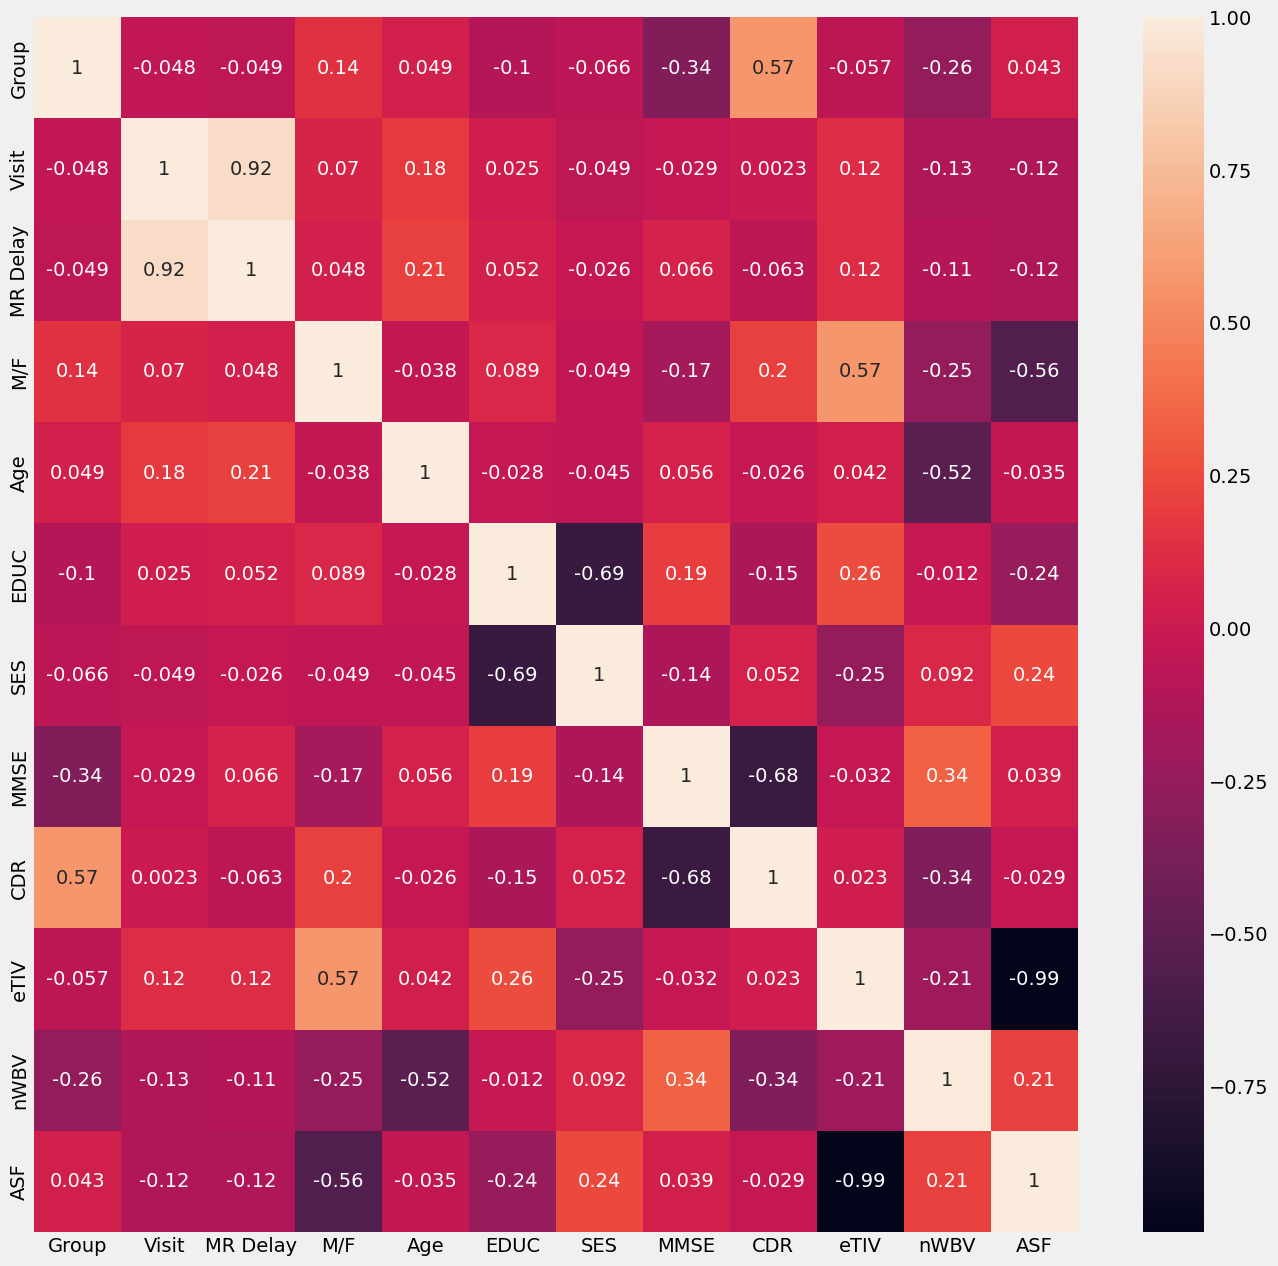

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True)
plt.show()


1. We first select only the 'MMSE' and 'CDR' columns from the DataFrame 'df1' and store them in a new DataFrame called 'mmse_cdr_df'.
2. We then create two separate histograms, one for the 'MMSE' column and another for the 'CDR' column.
3. Each histogram is plotted with Seaborn's histplot function, which allows us to create histograms with additional features like kernel density estimation (kde), specified number of bins (bins=20), and color customization.
4. We set the figure size for each histogram to (8, 6) inches.
5. Finally, we add titles, x-axis labels, and y-axis labels to each histogram to make them more informative and readable.


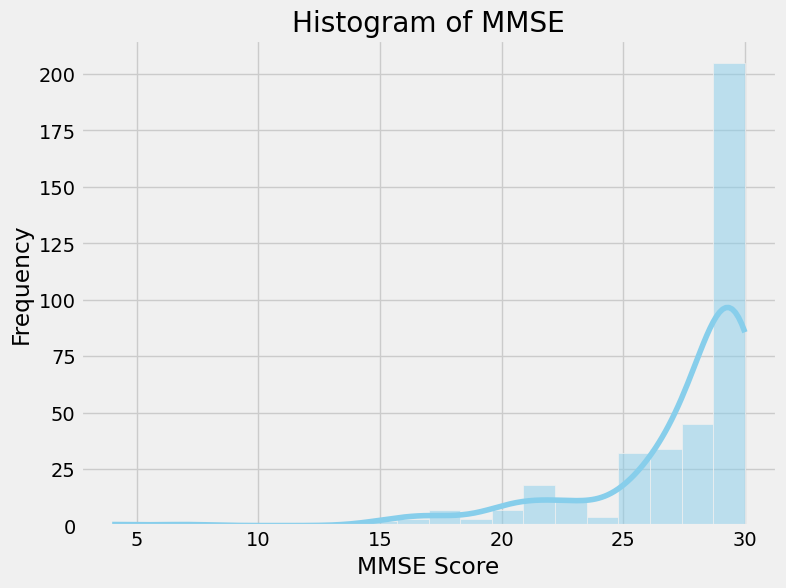

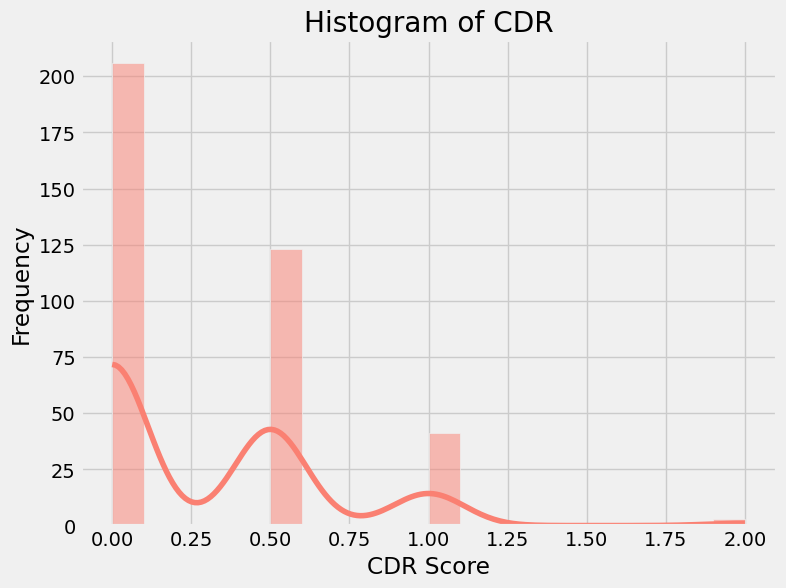

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only MMSE and CDR columns from df1
mmse_cdr_df = df1[['MMSE', 'CDR']]

# Plot histogram for MMSE
plt.figure(figsize=(8, 6))
sns.histplot(data=mmse_cdr_df, x='MMSE', kde=True, bins=20, color='skyblue')
plt.title('Histogram of MMSE')
plt.xlabel('MMSE Score')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for CDR
plt.figure(figsize=(8, 6))
sns.histplot(data=mmse_cdr_df, x='CDR', kde=True, bins=20, color='salmon')
plt.title('Histogram of CDR')
plt.xlabel('CDR Score')
plt.ylabel('Frequency')
plt.show()

## 🌟 🐠🌌✨ Welcome to the world of the SVM Method!
**This is the shining star of the mathematical realm**, equipped with outstanding predictive abilities and data analysis skills! SVM can accurately identify patterns and classify data, making it a standout in the field of machine learning. 🌟 🦋🔮✨

🚀 **Step into the realm of the SVM Method**, and you will discover a world full of truth and insight. This is a journey of relentless pursuit of knowledge. The powerful kernel functions and boundary-defining capabilities of SVM are like a bright light cutting through the darkness. 🚀 🐬🔭🌌✨

💪 **In the battleground of data science**, every decision is crucial. The SVM Method is incredibly strong, bringing confidence and clarity to analysts and practitioners. Join us as we explore the endless potential of the SVM Method and conquer the infinite possibilities of the future! 💪 🍭🧬🔬🚀

Imagine you have a bunch of toys, some of which are cars and some are balls. Now, you want to find a way to separate them into two groups based on their features like color, size, and shape.

That's where Support Vector Machines (SVM) come into play:

1. **Finding the Best Separating Line:** SVM helps you draw a line (or boundary) to separate the cars from the balls, so that all cars are on one side and all balls are on the other. But not just any line - it helps you find the best line that keeps these two groups as far apart as possible.

2. **Selecting the Best Features:** SVM also helps you decide which features of the toys are most important for distinguishing them. For example, perhaps color is more helpful than size in determining whether it's a car or a ball.

3. **Margin:** The space between the line and the nearest toys is called the margin. SVM tries to maximize this margin so that even if you get a new toy that's a bit tricky to classify, it still has a good distance from the line.

So, in simple terms, SVM is like an intelligent toy classifier. It finds the best way to classify toys based on their features, ensuring they are correctly grouped and there's enough space between the two groups.

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have loaded your dataset into a DataFrame called 'df1'

# Split the data into features and target variable
X = df1.drop(columns=['Group'])
y = df1['Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the SVM model
svm_model = SVC(kernel='linear', gamma='auto', C=10)
# Train the classifier
svm_model.fit(X_train, y_train)

SVC(C=10, gamma='auto', kernel='linear')

### Feature Importance Visualization from SVM Model Coefficients

**Purpose:**

The purpose of this code is to extract feature importance from the coefficients of the Support Vector Machine (SVM) model and visualize it as a bar plot.

**Step Explanation:**

1. We first extract the feature importance from the coefficients of the SVM model. These coefficients tell us the contribution of each feature to the model's predictions.

2. Next, we plot these feature importances as a horizontal bar plot. Each bar represents a feature, and the length indicates its importance.

3. Each bar's specific importance value is annotated on the right side of the bar, allowing us to see the importance of each feature clearly.

4. Finally, we remove the upper and lower spines (lines) of the plot to make it clearer and more readable.

Through this plot, we can quickly understand the importance of each feature to the SVM model, thereby gaining a better understanding of how the model operates.


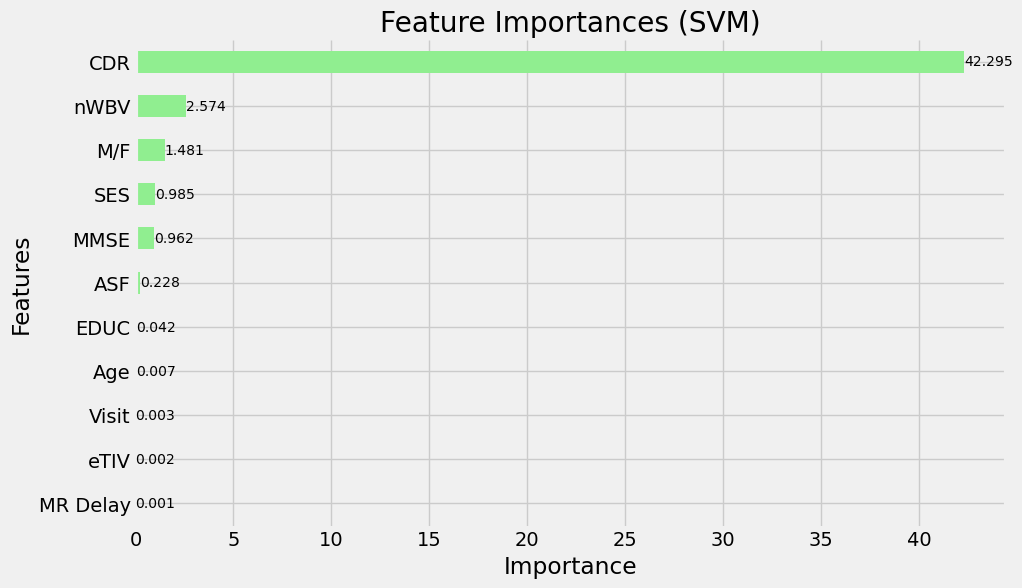

In [ ]:
# Extract feature importances from the SVM model coefficients
svm_importances = pd.Series(abs(svm_model.coef_[0]), index=X.columns)

# Plot feature importances
plt.figure(figsize=(10, 6))
ax = svm_importances.sort_values().plot(kind='barh', color='lightgreen')  # Horizontal bar plot
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances (SVM)')

# Annotate each bar with its value
for index, value in enumerate(svm_importances.sort_values()):
    ax.text(value, index, f'{value:.3f}', va='center', ha='left', fontsize=10)

# Remove spines (upper and lower lines)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

### Feature Importance Evaluation using Permutation Importance

**Purpose:**

The purpose of this code is to evaluate the importance of different features for a machine learning model. We use a technique called Permutation Importance for this evaluation. Let's explain this with a simple example:

Imagine you're learning how to predict whether someone will like a movie, and the model makes predictions based on different features like the person's age, gender, favorite movie genre, etc.

Now, we want to know how much each feature influences the model's prediction accuracy. Permutation Importance is a method that performs a permutation on each feature and measures the impact of this permutation on the model.

For example, if we permute the feature "**age**", which means randomly shuffling the ages of all people, and then use this shuffled age data to predict whether someone will like a movie, the prediction accuracy may decrease. This indicates that the feature "**age**" has a significant impact on the model's prediction.

The calculation of Permutation Importance involves repeating the permutation operation for each feature multiple times and then calculating the average impact of these operations on the model accuracy. This way, we can understand the contribution of each feature to the model and identify which features are most important.

Finally, we visualize these results using a bar plot to make it easier for us to see the **importance** of each feature.


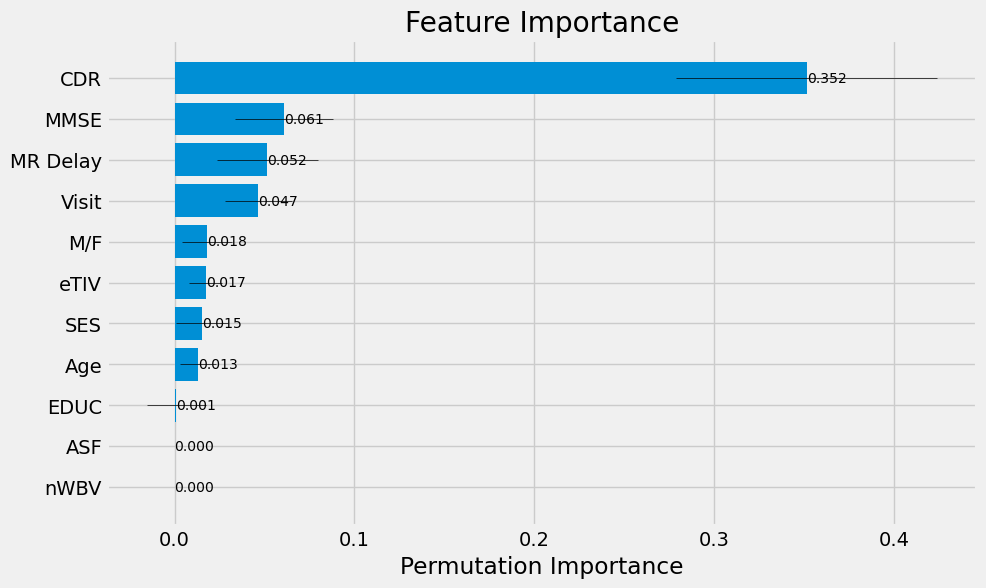

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Perform permutation importance
perm_importance = permutation_importance(svm_model, X_test, y_test, n_repeats=30, random_state=42)

# Sort feature importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance with error bars and values
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')

# Add error bars to the bars with thin lines
std = perm_importance.importances_std[sorted_idx]
plt.errorbar(perm_importance.importances_mean[sorted_idx], range(len(sorted_idx)), xerr=std, fmt='none', color='black', elinewidth=0.5)

# Add values to each bar with larger font size
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{perm_importance.importances_mean[sorted_idx[i]]:.3f}',
             va='center', ha='left', fontsize=10)

# Assuming X_train is your original DataFrame
# Assuming X_train is your original DataFrame
plt.yticks(range(len(sorted_idx)), df1.drop('Group', axis=1).columns[sorted_idx])


plt.show()


### Confusion Matrix:

Let's talk about something called a "Confusion Matrix". Don't worry, it's not as confusing as its name sounds!

Imagine you have a test with two types of questions: those you answer correctly and those you answer incorrectly.

Here's how the Confusion Matrix works:

1. **True Positive (TP):** These are the questions you answered correctly. For example, if you correctly identify a picture of a cat as a cat, that's a True Positive.

2. **True Negative (TN):** These are the questions you answered incorrectly, but should have answered incorrectly. For example, if you look at a picture of a dog and say it's a cat (which is wrong), but the picture is actually of a dog, that's a True Negative.

3. **False Positive (FP):** These are the questions you answered incorrectly, but should have answered correctly. So, if you look at a picture of a dog and say it's a cat (which is wrong), but the picture is actually of a cat, that's a False Positive.

4. **False Negative (FN):** These are the questions you answered correctly, but should have answered incorrectly. For example, if you look at a picture of a cat and say it's a dog (which is wrong), but the picture is actually of a cat, that's a False Negative.

So, the Confusion Matrix is like a scoreboard showing how you performed in the test. It tells you how many questions you got right, how many you got wrong, and whether those answers should have been right or wrong.


In [ ]:
# Predict on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8533333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        32
           1       0.94      0.97      0.95        32
           2       0.67      0.18      0.29        11

    accuracy                           0.85        75
   macro avg       0.80      0.71      0.70        75
weighted avg       0.84      0.85      0.82        75

Confusion Matrix:
[[31  1  0]
 [ 0 31  1]
 [ 8  1  2]]


1. **Precision:**
   Precision refers to the proportion of true positive samples among all the samples predicted as positive by the model. In other words, it measures the accuracy of the model in correctly predicting positives. Precision can be calculated using the following formula:

   Precision = True Positives / (True Positives + False Positives)

2. **Recall:**
   Recall, also known as sensitivity, refers to the proportion of true positive samples among all the true positives. In other words, it measures how successful the model is in finding true positives. Recall can be calculated using the following formula:

   Recall = True Positives / (True Positives + False Negatives)

3. **F1-score:**
   The F1-score is the harmonic mean of precision and recall. It provides a single measure of overall model performance, taking into account the balance between precision and recall. The F1-score is particularly useful when both precision and recall are important. It can be calculated using the following formula:

   F1-score = 2 * (Precision * Recall) / (Precision + Recall)

4. **Support:**
   Support refers to the number of true samples for each class. It is typically represented in terms of sample counts.

   Support = Sample Count

When we conduct medical tests, we want to ensure that the tests are accurate. It's like playing a guessing game, but this riddle is about health.

1. **Sensitivity**: This refers to how well a test can identify truly sick individuals. If a truly sick person is detected by the test, we say the test is "sensitive". Sensitivity is calculated by dividing the true positives (TP) by the sum of true positives (TP) and false negatives (FN).

2. **Specificity**: This refers to how well a test can identify truly healthy individuals. If a truly healthy person is detected by the test, we say the test is "specific". Specificity is calculated by dividing the true negatives (TN) by the sum of true negatives (TN) and false positives (FP).

3. **Positive Predictive Value (PPV)**: This refers to the proportion of truly sick individuals among all those who test positive. PPV is calculated by dividing the true positives (TP) by the sum of true positives (TP) and false positives (FP).

By understanding these metrics, we can better understand how effective a test is.


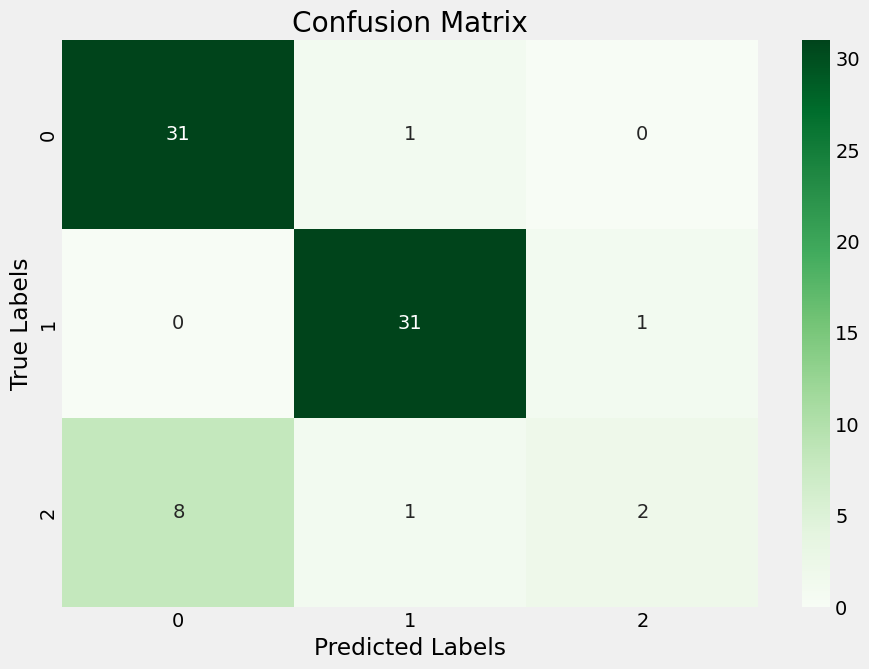

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        32
           1       0.94      0.97      0.95        32
           2       0.67      0.18      0.29        11

    accuracy                           0.85        75
   macro avg       0.80      0.71      0.70        75
weighted avg       0.84      0.85      0.82        75



In [ ]:

from sklearn.metrics import confusion_matrix
# Assuming you've already trained your classifier and made predictions
# y_pred = clf.predict(X_test)

# Compute confusion matrix for multi-class
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# For detailed metrics per class, you can print a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Of course! Imagine you're playing a game where you need to determine whether a picture is of a cat or a dog. Now, let's talk about two important things:

**True Positives (TP)**: This is when you correctly identify a picture of a cat as a cat.

**False Positives (FP)**: This is when you identify a picture of a dog as a cat (but it's actually a dog).

Now, let's imagine a line. If you're very good at the game, you'll have a lot of true positives and very few false positives. So, the line on the chart will be high. But if you're not so good at the game, you might have many false positives mixed in with the true positives. So, the line will be lower on the chart.

Now, let's add more detail:

**X-axis**: This shows the false positive rate. It's like measuring how many times you say a dog is a cat when it's actually a dog.

**Y-axis**: This shows the true positive rate. It's like measuring how many times you correctly say a cat is a cat.

So, when you're playing the game and doing very well, the line on the chart will be high up and towards the right because you'll have a high true positive rate and a low false positive rate.

But if you're not doing so well, guessing randomly, then the line will be closer to the diagonal, meaning you'll have almost the same number of false positives as true positives.

That line we're talking about? It's called the **ROC curve**. And the better you are at the game, the closer the curve gets to the top-left corner of the chart.


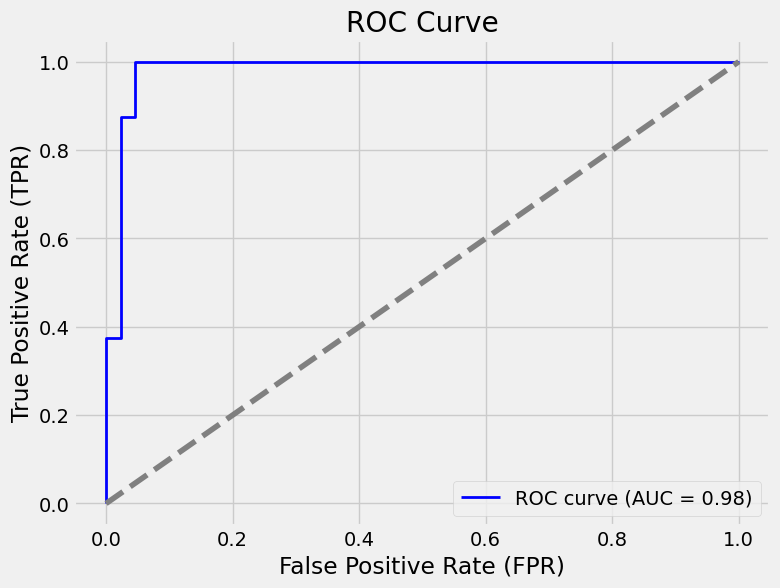

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Convert y_test to binary labels
y_test_binary = (y_test == 1)  # Assuming class 1 is the positive class

# Calculate decision function values
decision_values = svm_model.decision_function(X_test)

# Select the scores for the positive class
positive_scores = decision_values[:, 1]  # Assuming positive class is at index 1

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test_binary, positive_scores)

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(y_test_binary, positive_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## What is a Learning Curve?

A learning curve is an important concept in machine learning, and let's explain it in a friendly way.

### 1. Training Samples

Imagine you have a friend who wants to learn how to ride a bike. At first, they have no experience, so they may make mistakes and not ride very well. But as they practice more and more, they become better at riding a bike.

### 2. Training Score

The "training score" tells us how well the machine learning model performs on the training samples. It's like evaluating how well your friend is doing while practicing riding a bike.

### 3. Cross-Validation Score

Now, imagine your friend goes to a bike training school where they not only practice but also get feedback from a coach. This feedback helps them become better at riding a bike. In machine learning, we use cross-validation to evaluate the model's performance on examples it hasn't seen during training.

### 4. Learning Curve Plot

The learning curve plot shows how the training score and cross-validation score change as we provide more training samples. It's like observing the progress of your friend's bike riding skills over time.

### 5. Interpretation

If both the training score and cross-validation score are low, it means the model isn't learning from the data. But as both scores increase and approach each other, it indicates the model is effectively learning from the data rather than just memorizing the training samples.

So, when we observe a learning curve plot, we want to see both the training and cross-validation scores increasing and gradually converging, indicating that the model is effectively learning from the data.


### ⌛ This process may take approximately 20 more minutes to complete.
### Thank you for your patience and understanding. 🙏💔😔

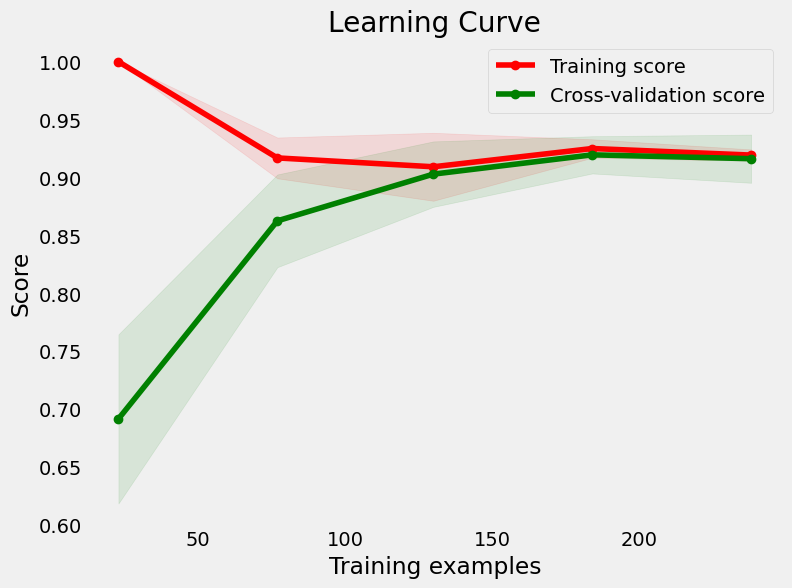

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Define the plot_learning_curve function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Call the plot_learning_curve function
plot_learning_curve(svm_model, "Learning Curve", X_train, y_train, cv=5)
plt.show()

Let's talk about something called a "Confusion Matrix". Don't worry, it's not as confusing as its name might sound!

Imagine you have a test with two types of questions: ones you answered correctly and ones you answered incorrectly.

Here's how the confusion matrix works:

1. **True Positives (TP):** These are the questions you answered correctly. For example, if you correctly identify a picture of a cat as a cat, that's a true positive.

2. **True Negatives (TN):** These are the questions you answered incorrectly but should have answered incorrectly. For example, if you see a picture of a dog and say it's a cat (which is wrong), but in reality, the picture is of a dog, that's a true negative.

3. **False Positives (FP):** These are the questions you answered incorrectly but should have answered correctly. So, if you see a picture of a dog and say it's a cat (which is wrong), but in reality, the picture is of a cat, that's a false positive.

4. **False Negatives (FN):** These are the questions you answered correctly but should have answered incorrectly. For example, if you see a picture of a cat and say it's a dog (which is wrong), but in reality, the picture is of a cat, that's a false negative.

So, the confusion matrix is like a scoreboard showing how you performed on the test. It tells you how many questions you answered correctly, how many you answered incorrectly, and whether your answers were supposed to be correct or not.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load and preprocess your df1 dataset
# Example: df1 = pd.read_csv('path_to_your_df1.csv')

# Define your custom kernel function for SVM
def custom_kernel(X, Y):
    # Update this function based on your custom kernel logic
    return np.dot(X, Y.T)

# Initialize and train your SVM classifier with the custom kernel
# Example training code here...

# Predicting the test set results
# Example: y_pred = clf.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Classification report for detailed metrics per class
print(classification_report(y_test, y_pred, target_names=['Undemented', 'Demented', 'Converted']))

# Class labels
class_labels = ['Undemented', 'Demented', 'Converted']

# Calculating TP, FP, FN, TN for each class
num_classes = conf_matrix.shape[0]
metrics = {'TP': [], 'FP': [], 'FN': [], 'TN': []}

for i in range(num_classes):
    TP = conf_matrix[i, i]
    FP = conf_matrix[:, i].sum() - TP
    FN = conf_matrix[i, :].sum() - TP
    TN = conf_matrix.sum() - conf_matrix[i, :].sum() - conf_matrix[:, i].sum() + TP

    metrics['TP'].append(TP)
    metrics['FP'].append(FP)
    metrics['FN'].append(FN)
    metrics['TN'].append(TN)
    print(f"Metrics for {class_labels[i]}: TP={TP}, FP={FP}, FN={FN}, TN={TN}")


Confusion Matrix:
 [[31  1  0]
 [ 0 31  1]
 [ 8  1  2]]
              precision    recall  f1-score   support

  Undemented       0.79      0.97      0.87        32
    Demented       0.94      0.97      0.95        32
   Converted       0.67      0.18      0.29        11

    accuracy                           0.85        75
   macro avg       0.80      0.71      0.70        75
weighted avg       0.84      0.85      0.82        75

Metrics for Undemented: TP=31, FP=8, FN=1, TN=35
Metrics for Demented: TP=31, FP=2, FN=1, TN=41
Metrics for Converted: TP=2, FP=1, FN=9, TN=63


1. **Precision:**
   Precision refers to the proportion of true positives among all samples predicted as positive by the model. In other words, it measures the accuracy of the model's positive predictions. Precision can be calculated using the following formula:
   
   Precision = True Positives / (True Positives + False Positives)

2. **Recall:**
   Recall, also known as sensitivity, is the proportion of true positives that were correctly identified by the model among all true positives. In other words, it measures how many true positives the model managed to find. Recall can be calculated using the following formula:
   
   Recall = True Positives / (True Positives + False Negatives)

3. **F1-score:**
   The F1-score is the harmonic mean of precision and recall. It provides a single measure of overall model performance, considering the balance between precision and recall. The F1-score is particularly useful when both precision and recall are important. It can be calculated using the following formula:
   
   F1-score = 2 * (Precision * Recall) / (Precision + Recall)

4. **Support:**
   Support refers to the number of true samples for each class. It is represented by the number of samples.


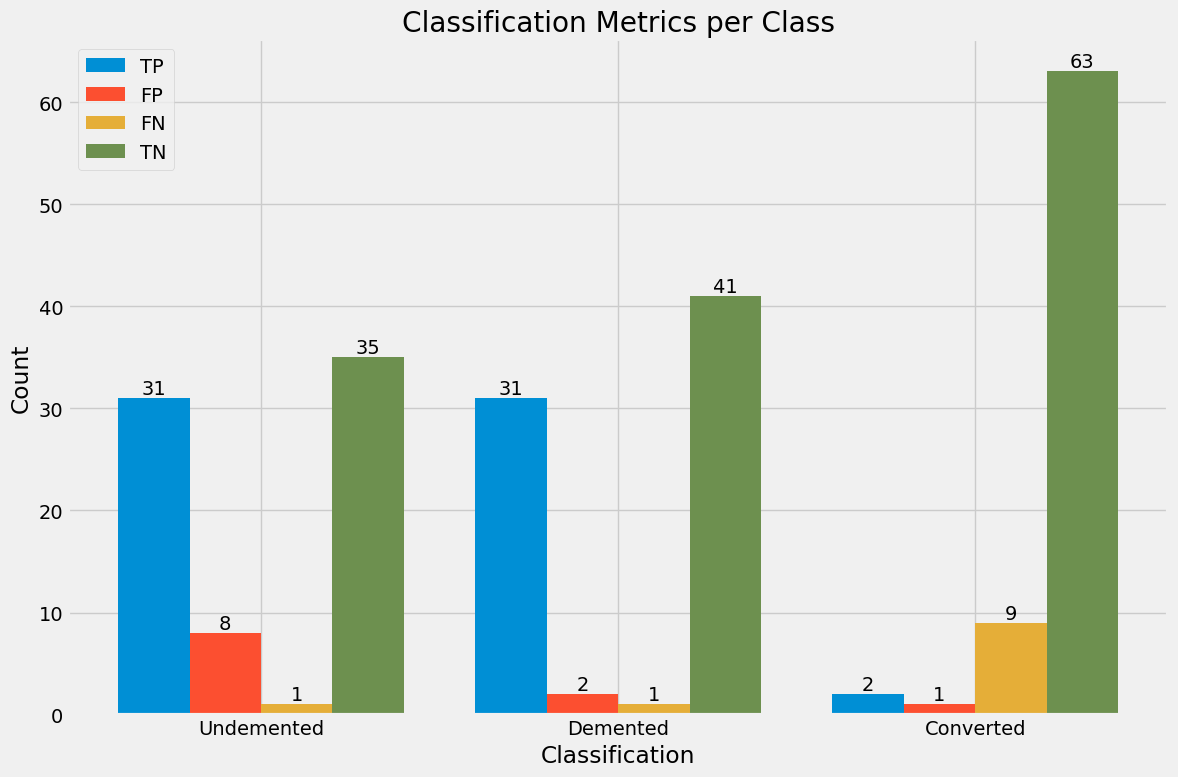

In [ ]:
# Assuming conf_matrix, y_test are properly defined and calculated above this section

# Calculate TP, FP, FN, TN for each class (revised from previous instructions as needed)
num_classes = len(np.unique(y_test))  # Ensure y_test is correctly defined
metrics = np.zeros((num_classes, 4))  # For storing TP, FP, FN, TN for each class

for i in range(num_classes):
    TP = conf_matrix[i, i]
    FP = conf_matrix[:, i].sum() - TP
    FN = conf_matrix[i, :].sum() - TP
    TN = conf_matrix.sum() - (FP + FN + TP)
    metrics[i] = [TP, FP, FN, TN]

# Updated class labels for plotting
class_labels = ['Undemented', 'Demented', 'Converted']

# Plotting
metrics_names = ['TP', 'FP', 'FN', 'TN']

fig, ax = plt.subplots(figsize=(12, 8))
barWidth = 0.2

# Create positions for the bars on the x-axis
positions = np.arange(len(metrics))

# Plot each metric in a group for each class
for i, metric in enumerate(metrics.T):  # Transpose to iterate over metrics
    ax.bar(positions + i * barWidth, metric, width=barWidth, label=metrics_names[i])

# Updating the x-axis label as requested
ax.set_xlabel('Classification', fontweight='normal')
ax.set_xticks(positions + barWidth * 1.5)
ax.set_xticklabels(class_labels)
ax.legend()

# Annotate values on top of bars
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}',
                (rect.get_x() + rect.get_width() / 2, height),
                ha='center', va='bottom')

plt.ylabel('Count')
plt.title('Classification Metrics per Class')
plt.tight_layout()
plt.show()


Let's talk about something called a "Confusion Matrix". Don't worry, it's not as confusing as its name might sound!

Imagine you have a test with two types of questions: ones you answered correctly and ones you answered incorrectly.

Here's how the confusion matrix works:

1. **True Positives (TP):** These are the questions you answered correctly. For example, if you correctly identify a picture of a cat as a cat, that's a true positive.

2. **True Negatives (TN):** These are the questions you answered incorrectly but should have answered incorrectly. For example, if you see a picture of a dog and say it's a cat (which is wrong), but in reality, the picture is of a dog, that's a true negative.

3. **False Positives (FP):** These are the questions you answered incorrectly but should have answered correctly. So, if you see a picture of a dog and say it's a cat (which is wrong), but in reality, the picture is of a cat, that's a false positive.

4. **False Negatives (FN):** These are the questions you answered correctly but should have answered incorrectly. For example, if you see a picture of a cat and say it's a dog (which is wrong), but in reality, the picture is of a cat, that's a false negative.

So, the confusion matrix is like a scoreboard showing how you performed on the test. It tells you how many questions you answered correctly, how many you answered incorrectly, and whether your answers were supposed to be correct or not.

**-------------------------------------------------------------------------------------------**

In [ ]:
df

Subject ID         MRI ID  Group  Visit  MR Delay  M/F Hand  Age  EDUC  \
0    OAS2_0001  OAS2_0001_MR1      0      1         0    1    R   87    14   
2    OAS2_0002  OAS2_0002_MR1      1      1         0    1    R   75    12   
5    OAS2_0004  OAS2_0004_MR1      0      1         0    0    R   88    18   
7    OAS2_0005  OAS2_0005_MR1      0      1         0    1    R   80    12   
10   OAS2_0007  OAS2_0007_MR1      1      1         0    1    R   71    16   
..         ...            ...    ...    ...       ...  ...  ...  ...   ...   
359  OAS2_0182  OAS2_0182_MR1      1      1         0    1    R   73    12   
361  OAS2_0183  OAS2_0183_MR1      0      1         0    0    R   66    13   
365  OAS2_0184  OAS2_0184_MR1      1      1         0    0    R   72    16   
367  OAS2_0185  OAS2_0185_MR1      1      1         0    1    R   80    16   
370  OAS2_0186  OAS2_0186_MR1      0      1         0    0    R   61    13   

     SES  MMSE  CDR  eTIV   nWBV    ASF  
0    2.0  27.0  0.0  1987  0.696  0.883  
2    2.0  23.0  0.5  1678  0.736  1.046  
5    3.0  28.0  0.0  1215  0.710  1.444  
7    4.0  28.0  0.0  1689  0.712  1.039  
10   2.0  28.0  0.5  1357  0.748  1.293  
..   ...   ...  ...   ...    ...    ...  
359  2.0  23.0  0.5  1661  0.698  1.056  
361  2.0  30.0  0.0  1495  0.746  1.174  
365  3.0  24.0  0.5  1354  0.733  1.296  
367  1.0  28.0  0.5  1704  0.711  1.030  
370  2.0  30.0  0.0  1319  0.801  1.331  

[150 rows x 15 columns]

This example demonstrates how to use the Support Vector Machine (SVM) algorithm to build a classification model. This algorithm can be used to handle classification problems, which involve categorizing data points into different classes based on their features.

Firstly, we define several sets of different parameter combinations, including 'C' and 'gamma'. The 'C' parameter controls the regularization strength of the model, while the 'gamma' parameter controls the width of the kernel function. By trying different parameter combinations, we can find the optimal model configuration.

Next, we use these parameter combinations to create several different SVM models. For each model, we train it using the training data and then evaluate its performance using the test data.

When evaluating the model performance, we print out the following detailed information:

- **Model Parameters:** These are the specific values of 'C' and 'gamma' parameters that we set.
- **Number of Support Vectors:** This is the number of data points selected as support vectors in the model.
- **Training Accuracy:** This is the accuracy of the model on the training data, i.e., how accurately the model predicts the training data.
- **Test Accuracy:** This is the accuracy of the model on the test data, i.e., how accurately the model predicts the test data.

Through this detailed information, we can assess the performance of each model under different parameter settings and select the optimal model for further classification tasks.

**RBF (Radial Basis Function)**:
Imagine you're playing with a spring, but this spring is no longer a straight line; it's curvy. The shape of the spring could be like a circle, ellipse, or any other weird shape. In the SVM model, RBF is a method used to define the shape of this spring.

If we liken RBF to a spring, then the shape of the spring is determined by the parameters of RBF. Different RBF parameters will generate springs of different shapes, and these shapes may be more effective for different types of data. Sometimes, we may need a more elastic spring to fit the data, and in that case, we would choose a larger RBF parameter. Conversely, sometimes we may need a less elastic spring, and we would choose a smaller RBF parameter.

**'C' Parameter**:
Imagine you're playing with a spring, and you can adjust the stiffness of the spring. If you make the spring very stiff (high 'C' value), it will be challenging to bend, and the shape of the spring will be well maintained. However, if you make the spring very soft (low 'C' value), it will bend easily, and the shape of the spring will change under external influences. In the Support Vector Machine (SVM) model, the 'C' parameter acts as a regulator controlling the stiffness of the spring, influencing how well the model fits the training data.

**'gamma' Parameter**:
Imagine you're painting a picture, and 'gamma' is like the thickness of the brush you're using. If you use a thin brush (low 'gamma' value), each stroke will have a larger impact area, and the colors will blend together. Conversely, if you use a thick brush (high 'gamma' value), each stroke's impact area will be small, and the colors will be more distinct. In the SVM model, the 'gamma' parameter acts as a switch controlling the thickness of the brush, influencing the complexity and flexibility of the model.


In [ ]:
from sklearn import svm

# Define combinations of RBF and C values
params = [
    {'C': 100, 'gamma': 0.0001},
    {'C': 100, 'gamma': 0.001},
    {'C': 10, 'gamma': 0.1}
]

# Create and train SVM models for each parameter combination
svm_models = []
for i, param in enumerate(params):
    # Create an SVM classifier
    clf = svm.SVC(kernel='rbf', **param)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Append the trained model to the list
    svm_models.append(clf)

# Print details and accuracy for each model
for i, model in enumerate(svm_models):
    print(f"Model {i+1} Details:")
    print("Parameters:", model.get_params())
    print("Support vectors count:", len(model.support_))
    print("Training accuracy:", model.score(X_train, y_train))
    print("Testing accuracy:", model.score(X_test, y_test))
    print()


Model 1 Details:
Parameters: {'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Support vectors count: 86
Training accuracy: 0.85
Testing accuracy: 0.6333333333333333

Model 2 Details:
Parameters: {'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Support vectors count: 88
Training accuracy: 0.975
Testing accuracy: 0.4666666666666667

Model 3 Details:
Parameters: {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1,

**Let's explain permutation importance in a simple way:**

Imagine you have a bag full of colored balls, and each ball represents something you like about your favorite toy, like a robot. Some balls might represent the color of the robot's eyes, some might represent its size, and others might represent its speed.

Now, you want to know what makes your robot toy cool and important. One way is to see what happens if you randomly change the order of these things. If your robot is still cool after changing the order, then those things might not be very important. But if your robot becomes less cool after changing the order, then those things might be important.

**The concept of permutation importance is like this.** Instead of using colored balls, we use information about our toy, like color, size, and speed. We randomly shuffle each piece of information and then see how much our model's performance changes when we change the order of each piece of information.

If changing the order of a piece of information doesn't have much impact on our model, then that piece of information might not be very important. But if changing its order makes our model perform poorly, then that piece of information might be crucial for making accurate predictions.

Therefore, **permutation importance helps us understand which pieces of information are most important for making accurate predictions.**


When the result of permutation importance is **positive**, it indicates that changing this feature will have a **positive impact** on the predictions of our model, meaning that this feature is **helpful** for the accuracy of the model. For example, if our toy is a robot, and changing the color of the robot makes the model's predictions more **accurate**, then the permutation importance of this feature will be **positive**.

On the other hand, when the result of permutation importance is **negative**, it indicates that changing this feature will have a **negative impact** on the predictions of our model, suggesting that this feature may not be very **helpful** for the accuracy of the model, or even be **detrimental**. For example, if changing the size of the robot makes the model's predictions less **accurate**, then the permutation importance of this feature will be **negative**.

In summary, when we see that the result of permutation importance is **positive**, it means that the feature is **important** for our model; whereas when the result is **negative**, it suggests that the feature may not be very **important** for our model, and may even have a **negative impact**.


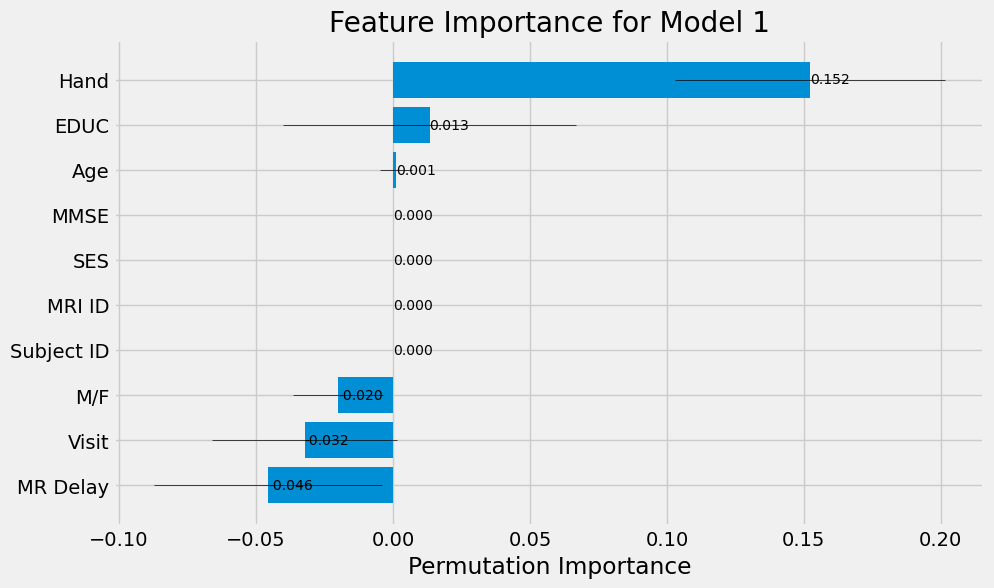

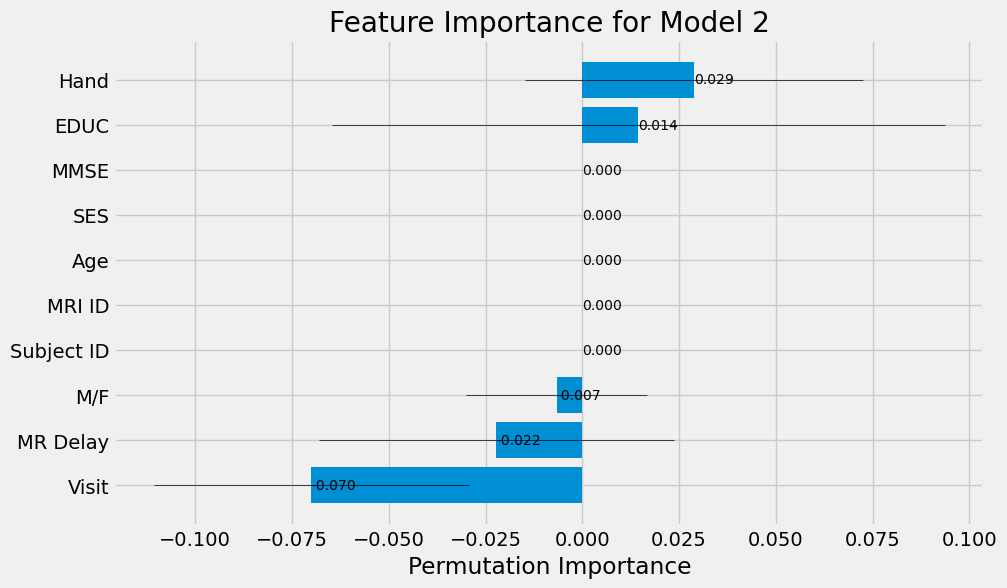

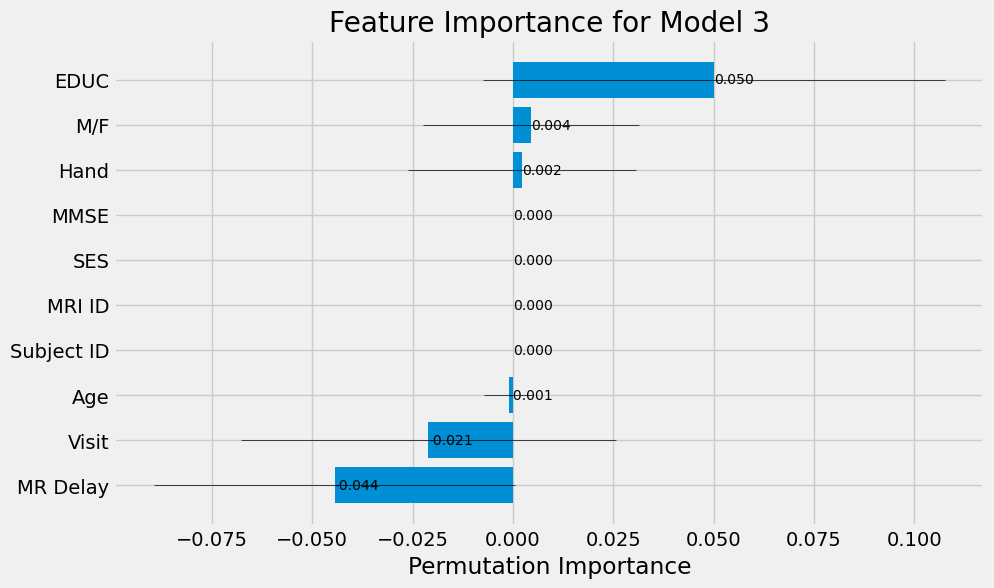

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Define a list to store permutation importance results for each model
perm_importances = []

# Loop through each SVM model
for i, model in enumerate(svm_models):
    # Perform permutation importance
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

    # Append the permutation importance results to the list
    perm_importances.append(perm_importance)

    # Sort feature importance
    sorted_idx = perm_importance.importances_mean.argsort()

    # Plot permutation importance with error bars and values
    plt.figure(figsize=(10, 6))
    bars = plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
    plt.xlabel('Permutation Importance')
    plt.title(f'Feature Importance for Model {i+1}')

    # Add error bars to the bars with thin lines
    std = perm_importance.importances_std[sorted_idx]
    plt.errorbar(perm_importance.importances_mean[sorted_idx], range(len(sorted_idx)), xerr=std, fmt='none', color='black', elinewidth=0.5)

    # Add values to each bar with larger font size
    for i, bar in enumerate(bars):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{perm_importance.importances_mean[sorted_idx[i]]:.3f}',
                 va='center', ha='left', fontsize=10)

    # Assuming X_train is your original DataFrame
    plt.yticks(range(len(sorted_idx)), df.drop('Group', axis=1).columns[sorted_idx])

    plt.show()


# Machine Learning Story

1. **Preparation**: Imagine you have a big box filled with all sorts of toys, each toy with its own features like color, size, and shape.

2. **Selecting Toys**: We want to teach a smart machine how to play with these toys, but we can't expect the machine to learn all the toys at once. So, we select some toys to teach the machine and keep the others for testing later.

3. **Splitting into Two Groups**: We divide the toys into two groups, one for teaching the machine and the other for testing the machine's learned knowledge.

4. **Finding Helpers**: We enlist a few teachers to help teach the machine, each with their own teaching methods.

5. **Starting the Lessons**: The teachers take the toys we selected and teach the machine how to play with them. They tell the machine about the color, size, and shape of each toy.

6. **Exam Time**: After the lessons are done, we let the machine play with the toys we kept for testing to see how much it learned.

7. **Checking the Answers**: We see if the machine played correctly. If it played with most of the toys correctly, then that teacher did a good job.

8. **Comparing Results**: We compare the results from each teacher to see which one taught the best.

9. **What We Learned**: Through this learning process, we help the machine become smarter so it can play with toys better. It's like going to school where different teachers teach us different subjects, and we see which subject we learn best.


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np  # Assuming you have numpy imported

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Extract features (X) and labels (y) from the DataFrame
X = df_numeric.drop(columns=['Group'])
y = df['Group']

# Split the data into training and testing sets
# Use 45 cases for testing (30% of 150)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define combinations of RBF and C values
params = [
    {'kernel': 'rbf', 'gamma': 1.0E-4, 'C': 100},
    {'kernel': 'rbf', 'gamma': 1.0E-3, 'C': 100},
    {'kernel': 'rbf', 'gamma': 1.0E-1, 'C': 10}
]

# Train and evaluate SVM models for each parameter combination
svm_models = []  # List to store trained SVM models
for i, param in enumerate(params):
    # Create an SVM classifier
    svm_model = svm.SVC(**param)

    # Train the classifier
    svm_model.fit(X_train, y_train)

    # Add the trained model to the list
    svm_models.append(svm_model)

    # Make predictions
    predictions = svm_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model {i+1} Accuracy:", accuracy)

# Now svm_models[0] contains svm_model1, svm_models[1] contains svm_model2, and svm_models[2] contains svm_model3


Model 1 Accuracy: 0.6333333333333333
Model 2 Accuracy: 0.4666666666666667
Model 3 Accuracy: 0.43333333333333335


## Accuracy:

Accuracy tells you how many of your answers are correct among all questions. If you answer 60 questions correctly out of a total of 100 questions, then your accuracy is 60%.

So, accuracy measures how many of your answers are correct. It's like your grade, telling you how well you did.

---

## Let's Talk About Accuracy

Imagine you have a test with many questions, and you want to know how many questions you answered correctly.

- **Accuracy:** Accuracy tells you how many of your answers are correct among all questions. If you answer 60 questions correctly out of a total of 100 questions, then your accuracy is 60%.

So, accuracy measures how many of your answers are correct. It's like your grade, telling you how well you did.


Confusion Matrix for Model 1 (scaled to 105 total cases):
[[38 21  4]
 [ 0 28  0]
 [10  4  0]]


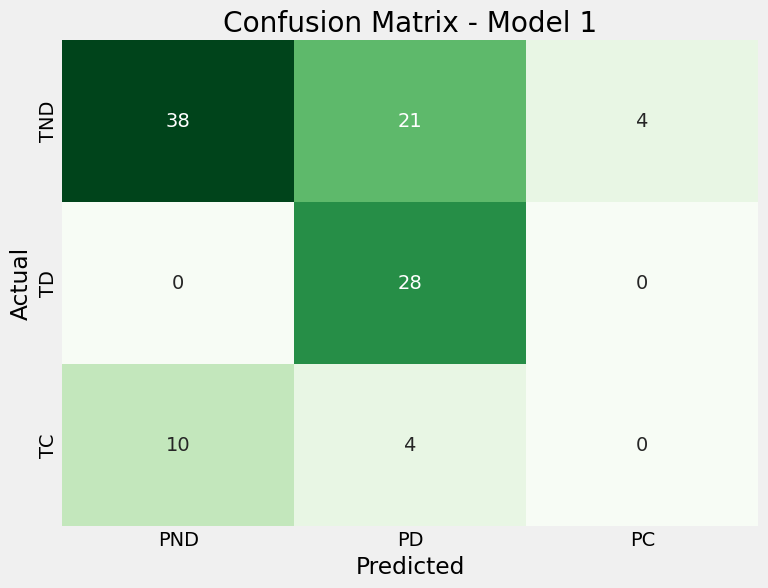

Accuracy for Model 1: 0.63
Classification Report for Model 1:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69        18
           1       0.53      1.00      0.70         8
           2       0.00      0.00      0.00         4

    accuracy                           0.63        30
   macro avg       0.44      0.54      0.46        30
weighted avg       0.61      0.63      0.60        30

Confusion Matrix for Model 2 (scaled to 105 total cases):
[[24 24 14]
 [ 4 24  0]
 [10  4  0]]


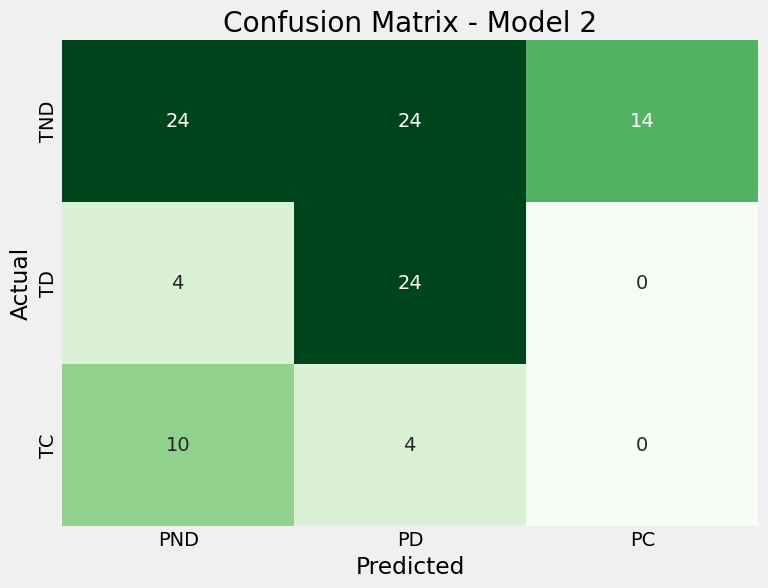

Accuracy for Model 2: 0.47
Classification Report for Model 2:
              precision    recall  f1-score   support

           0       0.64      0.39      0.48        18
           1       0.47      0.88      0.61         8
           2       0.00      0.00      0.00         4

    accuracy                           0.47        30
   macro avg       0.37      0.42      0.36        30
weighted avg       0.51      0.47      0.45        30

Confusion Matrix for Model 3 (scaled to 105 total cases):
[[18 42  4]
 [ 0 28  0]
 [ 4 10  0]]


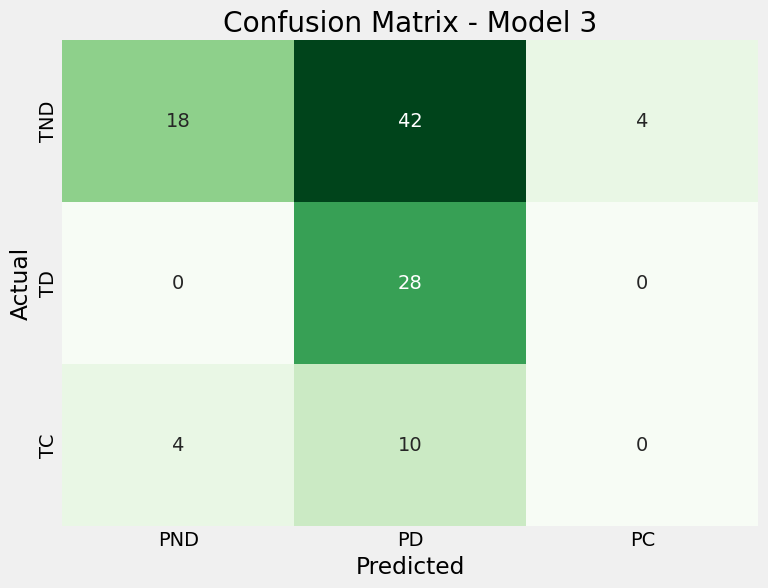

Accuracy for Model 3: 0.43
Classification Report for Model 3:
              precision    recall  f1-score   support

           0       0.83      0.28      0.42        18
           1       0.35      1.00      0.52         8
           2       0.00      0.00      0.00         4

    accuracy                           0.43        30
   macro avg       0.39      0.43      0.31        30
weighted avg       0.59      0.43      0.39        30



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, total_cases):
    # Calculate the scaling factor to represent total_cases
    scaling_factor = total_cases / np.sum(cm)
    cm_scaled = np.round(cm * scaling_factor).astype(int)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_scaled, annot=True, fmt='d', cmap='Greens', cbar=False)

    # Define custom labels for both x-axis and y-axis
    labels = ['PND', 'PD', 'PC']
    plt.xticks(ticks=[0.5, 1.5, 2.5], labels=labels)
    plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['TND', 'TD', 'TC'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Loop through each model and train, predict, and evaluate
for i, param in enumerate(params):
    # Create an SVM classifier
    clf = svm.SVC(**param)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    predictions = clf.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Calculate the total number of cases in the confusion matrix
    total_cases = np.sum(cm)

    # Print confusion matrix scaled to represent total cases
    print(f"Confusion Matrix for Model {i+1} (scaled to 105 total cases):")
    print(np.round(cm * (105 / total_cases)).astype(int))

    # Plot confusion matrix
    model_name = f'Model {i+1}'
    plot_confusion_matrix(cm, model_name, total_cases=105)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy for {model_name}: {accuracy:.2f}")

    # Generate classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, predictions))


Confusion Matrix for Model 1 (scaled to 105 total cases):
[[38 21  4]
 [ 0 28  0]
 [10  4  0]]



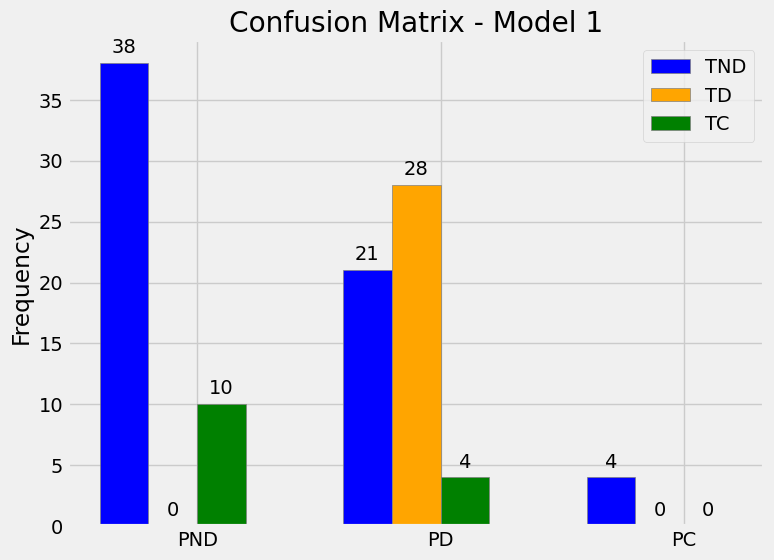

Confusion Matrix for Model 2 (scaled to 105 total cases):
[[24 24 14]
 [ 4 24  0]
 [10  4  0]]



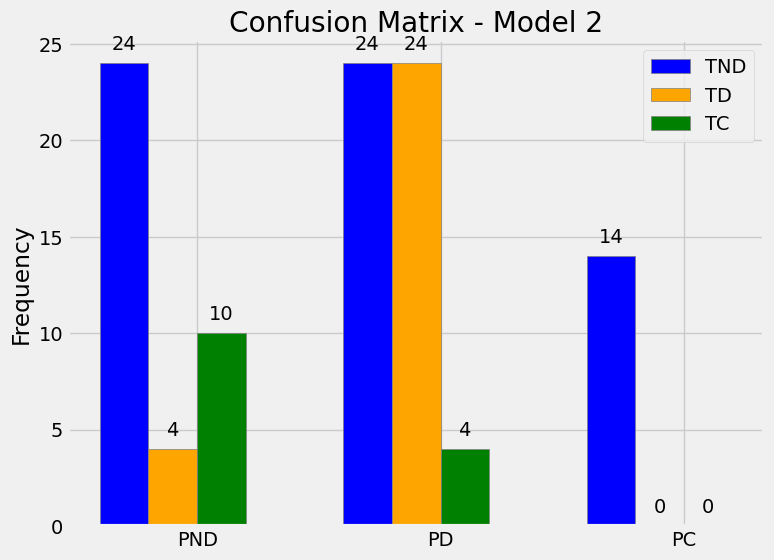

Confusion Matrix for Model 3 (scaled to 105 total cases):
[[18 42  4]
 [ 0 28  0]
 [ 4 10  0]]



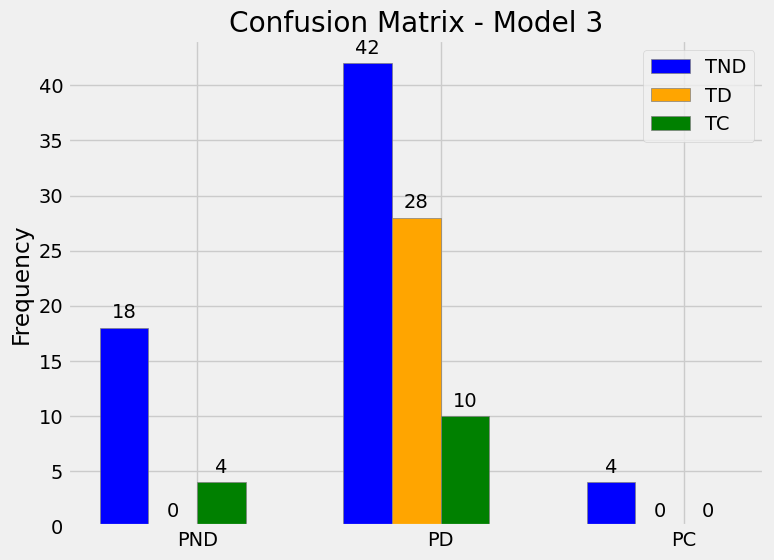

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the confusion matrices for each model
confusion_matrices = [
    np.array([[38, 21, 4], [0, 28, 0], [10, 4, 0]]),   # Model 1
    np.array([[24, 24, 14], [4, 24, 0], [10, 4, 0]]),  # Model 2
    np.array([[18, 42, 4], [0, 28, 0], [4, 10, 0]])    # Model 3
]

# Define class labels
class_labels = ['PND', 'PD', 'PC']  # PND: non-demented, PD: demented, PC: convert

# Define model names
model_names = ['Model 1', 'Model 2', 'Model 3']

# Define the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(class_labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Loop through each model
for i, cm in enumerate(confusion_matrices):
    # Print the confusion matrix
    print(f"Confusion Matrix for {model_names[i]} (scaled to 105 total cases):")
    print(cm)
    print()  # Add a new line for separation

    # Plot bar plots
    plt.figure(figsize=(8, 6))  # Adjust the figure size
    plt.bar(r1, cm[0], color='blue', width=bar_width, edgecolor='grey', label='TND')
    plt.bar(r2, cm[1], color='orange', width=bar_width, edgecolor='grey', label='TD')
    plt.bar(r3, cm[2], color='green', width=bar_width, edgecolor='grey', label='TC')

    # Add labels, title, and legend
    plt.ylabel('Frequency', fontweight='normal')
    plt.title(f'Confusion Matrix - {model_names[i]}')
    plt.xticks([r + bar_width * 1.5 for r in range(len(class_labels))], class_labels)
    plt.legend()

    # Add values on top of each bar
    for j, r in enumerate([r1, r2, r3]):
        for k, value in enumerate(cm[j]):
            if i == 0:  # For Model 1, align values in the center
                plt.text(r[k] + bar_width * (i + 0.5) - 0.1, value + 0.5, str(value), ha='center', va='bottom')
            elif i == 1:  # For Model 2, align values slightly to the left
                plt.text(r[k] + bar_width * (i + 0.5) - 0.3, value + 0.5, str(value), ha='center', va='bottom')
            else:  # For Model 3, align values slightly to the right
                plt.text(r[k] + bar_width * (i + 0.5) - 0.5, value + 0.5, str(value), ha='center', va='bottom')

    plt.show()


## True Positive (TP):
This is when you correctly identify a picture of a cat as a cat.

## False Positive (FP):
This is when you incorrectly identify a picture of a dog as a cat (but it's actually a dog).

Now, let's imagine a line. If you're very good at the game, you'll have a lot of true positives and very few false positives. So, the line will be high on the chart. But if you're not doing well in the game, you might have many false positives mixed in with the true positives. So, the line will be lower on the chart.

Now, let's add more details:

**X-axis:** This shows the false positive rate. It's like measuring how many times you say a dog is a cat when it's actually a dog.

**Y-axis:** This shows the true positive rate. It's like measuring how many times you correctly say a cat is a cat.

So, when you're doing really well in the game, the line on the chart will be very high and towards the right because you'll have a high true positive rate and a low false positive rate.

But if you're not doing well, guessing randomly, then the line will be closer to the diagonal, meaning you'll have almost the same number of false positives as true positives.

That line we talked about? It's called the **ROC curve**. And the better you are in the game, the closer the curve gets to the top-left corner of the chart.


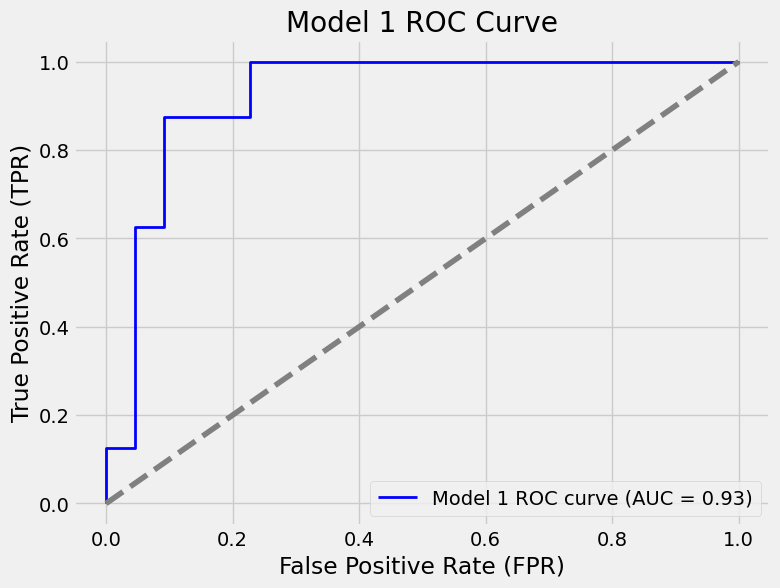

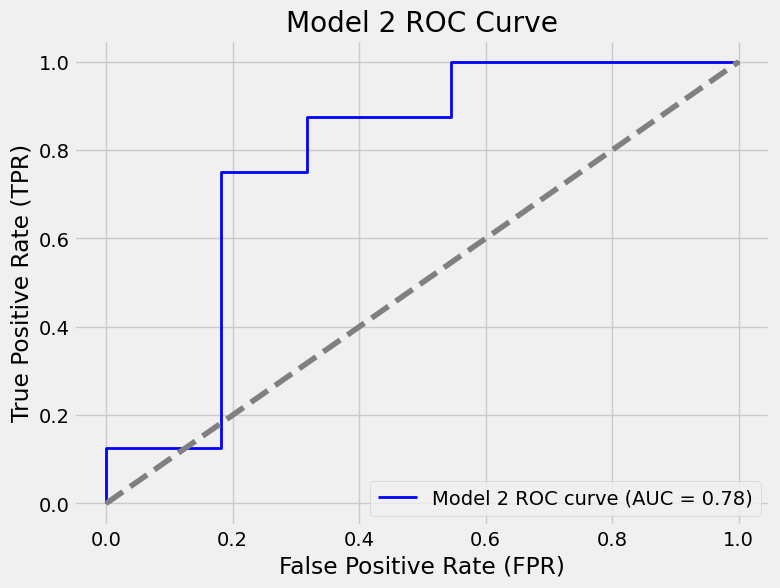

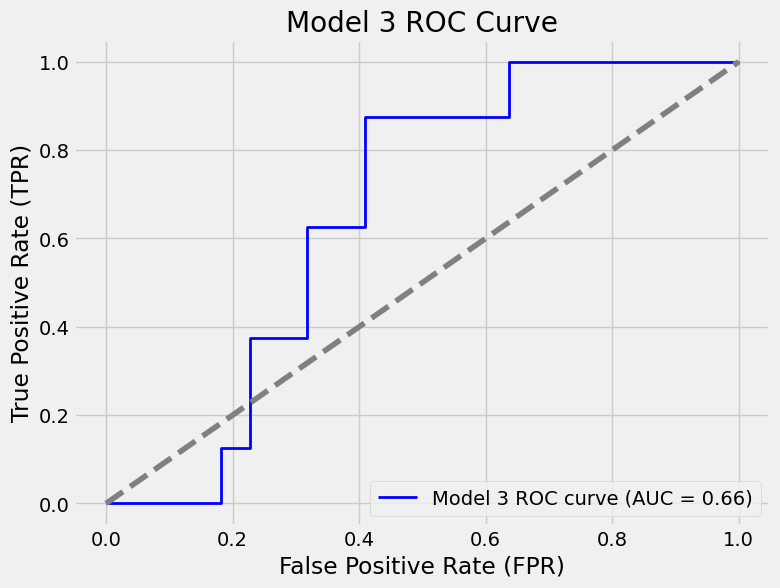

Model 1 AUC: 0.93
Model 2 AUC: 0.78
Model 3 AUC: 0.66


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have trained SVM models named svm_models[0], svm_models[1], and svm_models[2]
svm_models = [svm_models[0], svm_models[1], svm_models[2]]

# Initialize a list to store AUC values
auc_values = []

# Plot ROC curve for each SVM model
for i, model in enumerate(svm_models):
    # Calculate decision function values
    decision_values = model.decision_function(X_test)

    # Select the scores for the positive class
    positive_scores = decision_values[:, 1]  # Assuming positive class is at index 1

    # Convert y_test to binary labels
    y_test_binary = (y_test == 1)  # Assuming class 1 is the positive class

    # Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test_binary, positive_scores)

    # Calculate the Area Under the ROC Curve (AUC)
    auc = roc_auc_score(y_test_binary, positive_scores)
    auc_values.append(auc)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Model {i+1} ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'Model {i+1} ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Print AUC values
for i, auc in enumerate(auc_values):
    print(f"Model {i+1} AUC: {auc:.2f}")


1. **Model 1 AUC: 0.93**
   - Model 1 has an AUC of **0.93**, indicating excellent performance. This means the model can effectively distinguish between positive and negative samples, with a high true positive rate and a low false positive rate.

2. **Model 2 AUC: 0.78**
   - Model 2 has an AUC of **0.78**, lower than Model 1 but still acceptable. This indicates that Model 2 performs reasonably well in distinguishing between positive and negative samples, although not as effectively as Model 1.

3. **Model 3 AUC: 0.66**
   - Model 3 has the lowest AUC among the three models, at **0.66**. This indicates relatively poorer performance compared to the other models. Model 3 may encounter more difficulties in correctly classifying positive and negative samples, resulting in less effective differentiation between the two classes.

In summary, a higher AUC value indicates better performance in the classification task, with **Model 1** performing the best, followed by **Model 2**, and then **Model 3**.


**If there is little distinction between the training curve and the validation curve**
  - This may indicate that the model is encountering some issues. Generally, the training curve should show an improvement as the number of training samples increases, while the validation curve should increase when the number of training samples is small but remain stable or slightly decrease after reaching a certain point. If there is no clear distinction between the two, it could be because the model is too simple to learn enough information from the data, or it could be due to issues with data quality or other model settings.


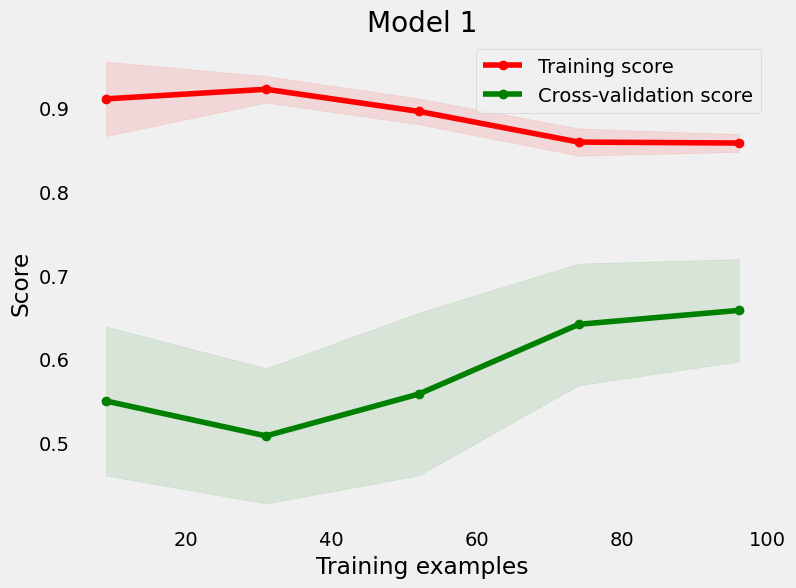

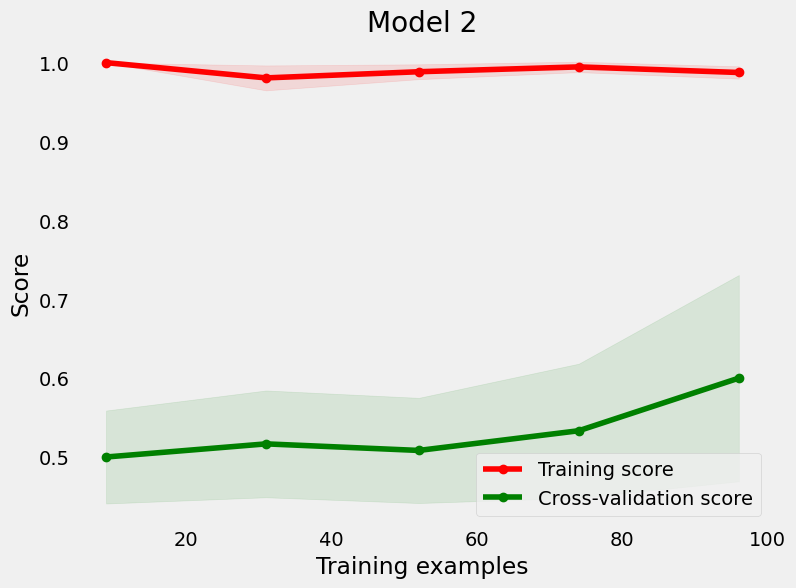

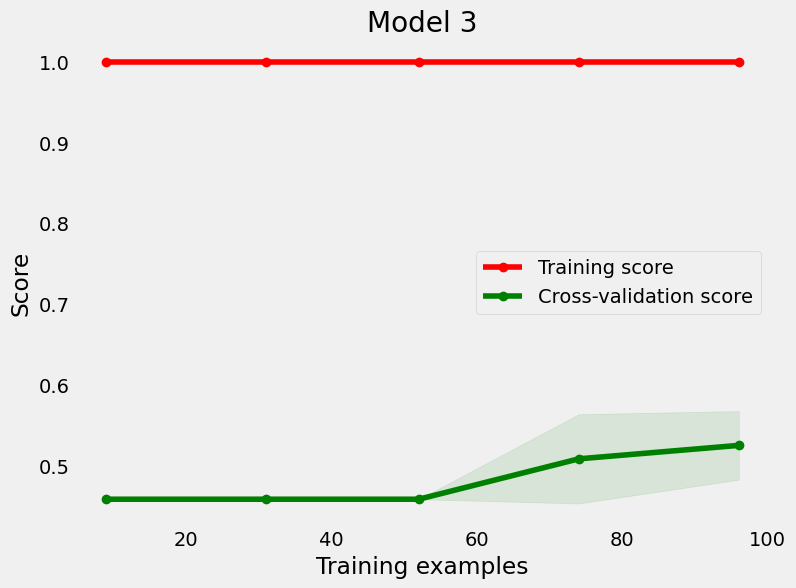

In [ ]:
# Call the plot_learning_curve function for svm_models[0]
plot_learning_curve(svm_models[0], "Learning Curve (Model 1)", X_train, y_train, cv=5)
plt.title("Model 1")
plt.show()

# Call the plot_learning_curve function for svm_models[1]
plot_learning_curve(svm_models[1], "Learning Curve (Model 2)", X_train, y_train, cv=5)
plt.title("Model 2")
plt.show()

# Call the plot_learning_curve function for svm_models[2]
plot_learning_curve(svm_models[2], "Learning Curve (Model 3)", X_train, y_train, cv=5)
plt.title("Model 3")
plt.show()


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Extract features (X) and labels (y) from the DataFrame
X = df_numeric.drop(columns=['Group'])
y = df['Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define combinations of RBF and C values
params = [
    {'kernel': 'rbf', 'gamma': 1.0E-4, 'C': 100},
    {'kernel': 'rbf', 'gamma': 1.0E-3, 'C': 100},
    {'kernel': 'rbf', 'gamma': 1.0E-1, 'C': 10}
]

# Train and evaluate SVM models for each parameter combination
for i, param in enumerate(params):
    # Create an SVM classifier
    clf = svm.SVC(**param)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    predictions = clf.predict(X_test)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)

    # Print the confusion matrix for each model
    print(f"Model {i+1} Confusion Matrix:")
    print(conf_matrix)

Model 1 Confusion Matrix:
[[11  6  1]
 [ 0  8  0]
 [ 3  1  0]]
Model 2 Confusion Matrix:
[[7 7 4]
 [1 7 0]
 [3 1 0]]
Model 3 Confusion Matrix:
[[ 5 12  1]
 [ 0  8  0]
 [ 1  3  0]]


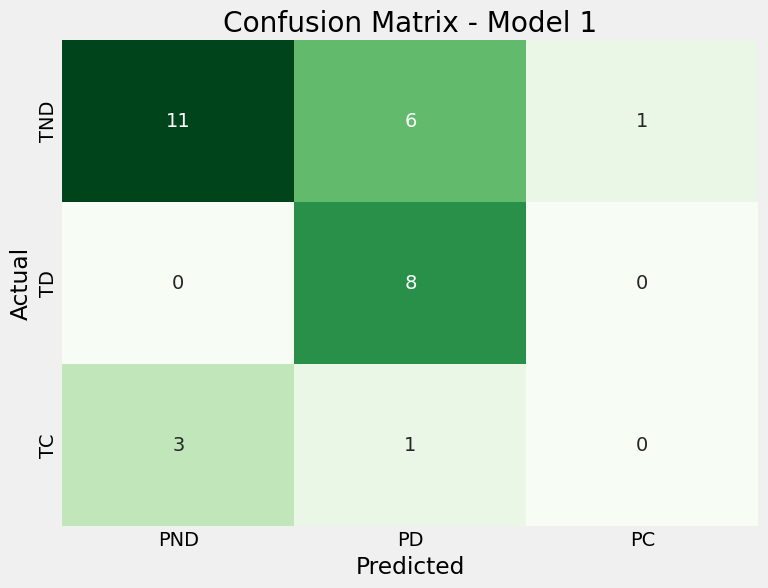

Accuracy for Model 1: 0.63
Classification Report for Model 1:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69        18
           1       0.53      1.00      0.70         8
           2       0.00      0.00      0.00         4

    accuracy                           0.63        30
   macro avg       0.44      0.54      0.46        30
weighted avg       0.61      0.63      0.60        30



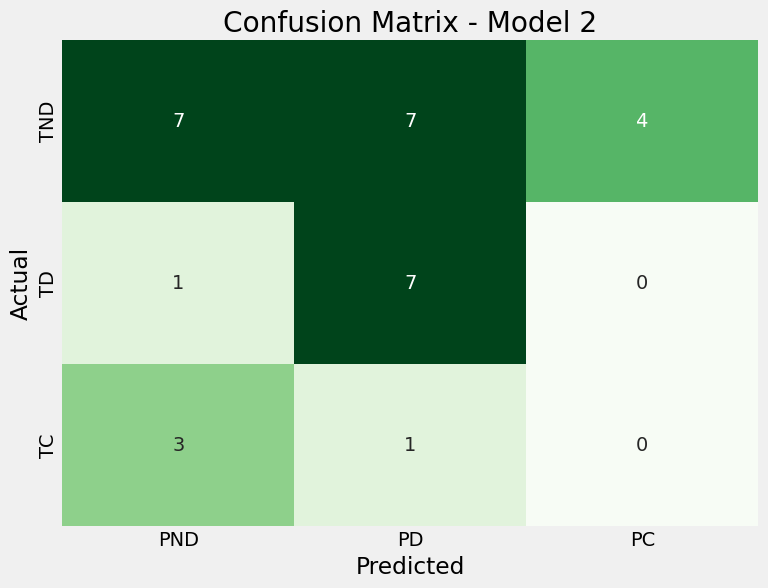

Accuracy for Model 2: 0.47
Classification Report for Model 2:
              precision    recall  f1-score   support

           0       0.64      0.39      0.48        18
           1       0.47      0.88      0.61         8
           2       0.00      0.00      0.00         4

    accuracy                           0.47        30
   macro avg       0.37      0.42      0.36        30
weighted avg       0.51      0.47      0.45        30



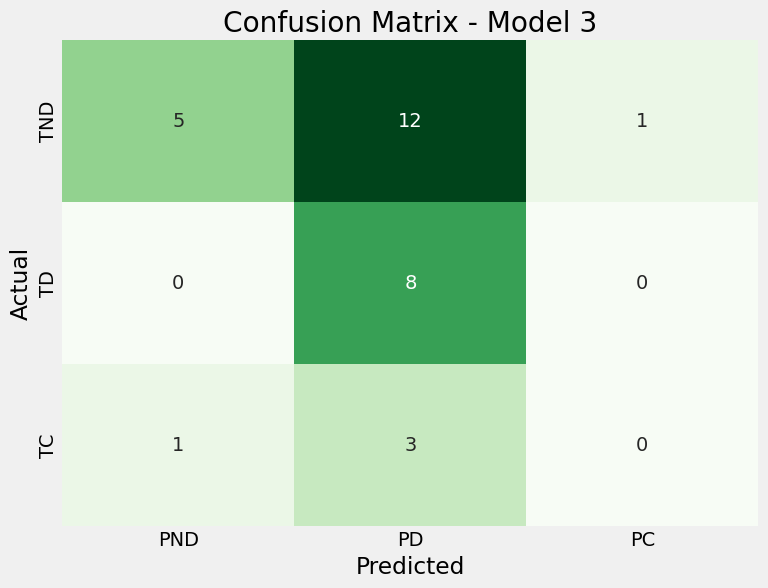

Accuracy for Model 3: 0.43
Classification Report for Model 3:
              precision    recall  f1-score   support

           0       0.83      0.28      0.42        18
           1       0.35      1.00      0.52         8
           2       0.00      0.00      0.00         4

    accuracy                           0.43        30
   macro avg       0.39      0.43      0.31        30
weighted avg       0.59      0.43      0.39        30



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)

    # Define custom labels for both x-axis and y-axis
    labels = ['PND', 'PD', 'PC']
    plt.xticks(ticks=[0.5, 1.5, 2.5], labels=labels)
    plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['TND', 'TD', 'TC'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Loop through each model and train, predict, and evaluate
for i, param in enumerate(params):
    # Create an SVM classifier
    clf = svm.SVC(**param)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    predictions = clf.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Plot confusion matrix
    model_name = f'Model {i+1}'
    plot_confusion_matrix(cm, model_name)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy for {model_name}: {accuracy:.2f}")

    # Generate classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, predictions))

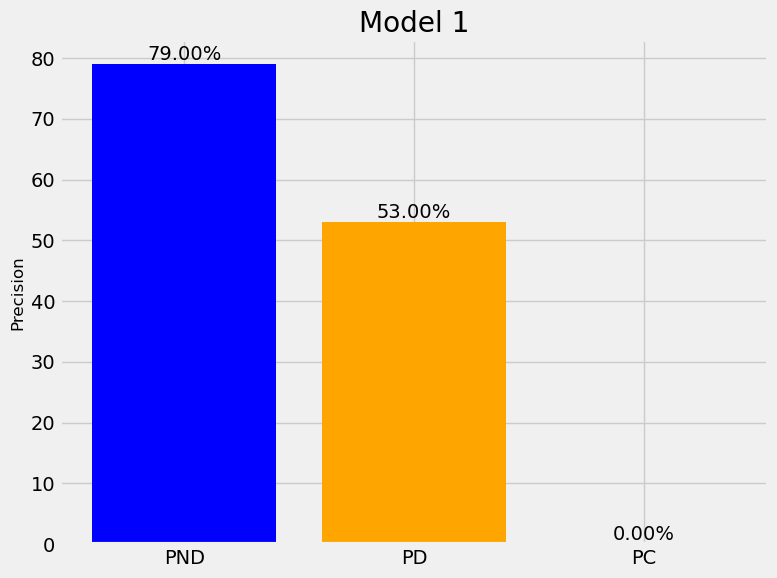

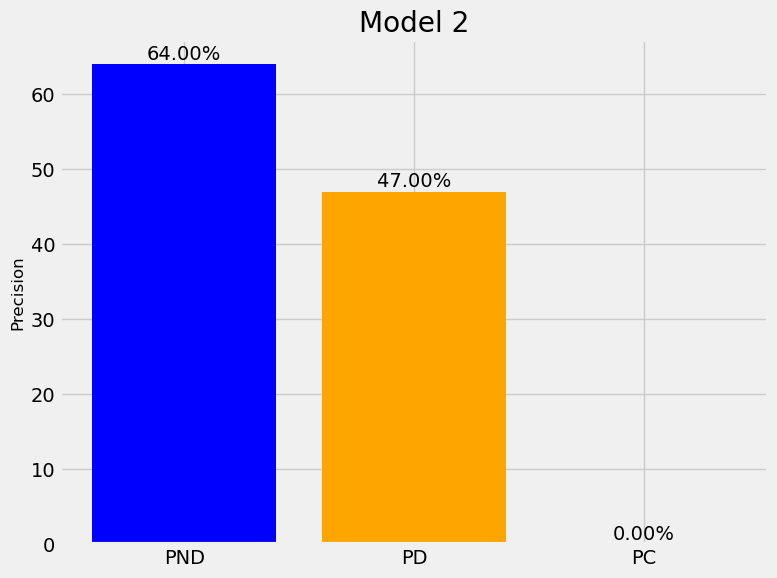

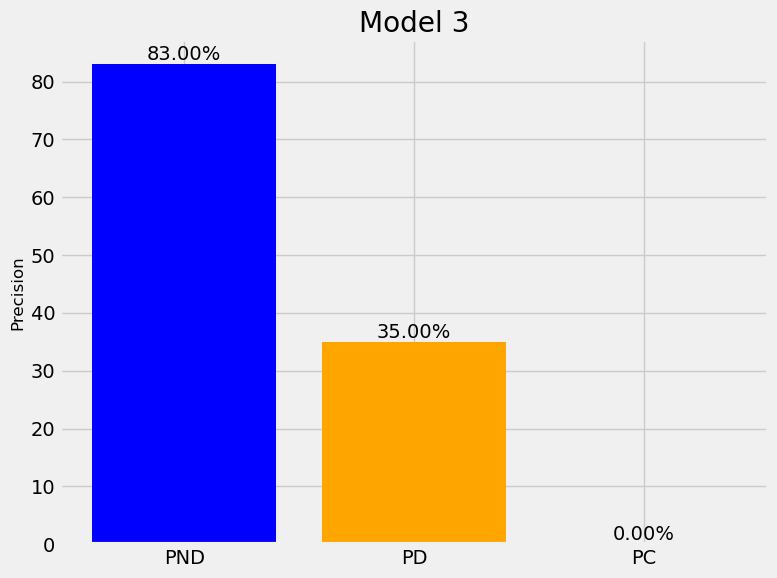

In [ ]:
import matplotlib.pyplot as plt

# Precision values obtained from classification reports
precision_values = [
    {"PND": 79.00, "PD": 53.00, "PC": 0.00},  # Model 1
    {"PND": 64.00, "PD": 47.00, "PC": 0.00},  # Model 2
    {"PND": 83.00, "PD": 35.00, "PC": 0.00}   # Model 3
]

# Class labels and model names
class_labels = ["PND", "PD", "PC"]
model_names = ["Model 1", "Model 2", "Model 3"]

# Plot precision values for each model
for i, precision_data in enumerate(precision_values):
    # Create subplots
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    # Plot precision values for each class
    for j, class_label in enumerate(class_labels):
        precision = precision_data[class_label]
        ax.bar(j, precision, color=['blue', 'orange', 'green'][j])
        ax.text(j, precision + 0.04, f'{precision:.2f}%', ha='center', va='bottom', color='black')

    # Set labels and title
    ax.set_ylabel('Precision', fontweight='normal', fontsize=12)
    ax.set_title(model_names[i])

    # Set x-axis ticks and labels
    plt.xticks(range(len(class_labels)), class_labels)

    # Show plot
    plt.tight_layout()
    plt.show()


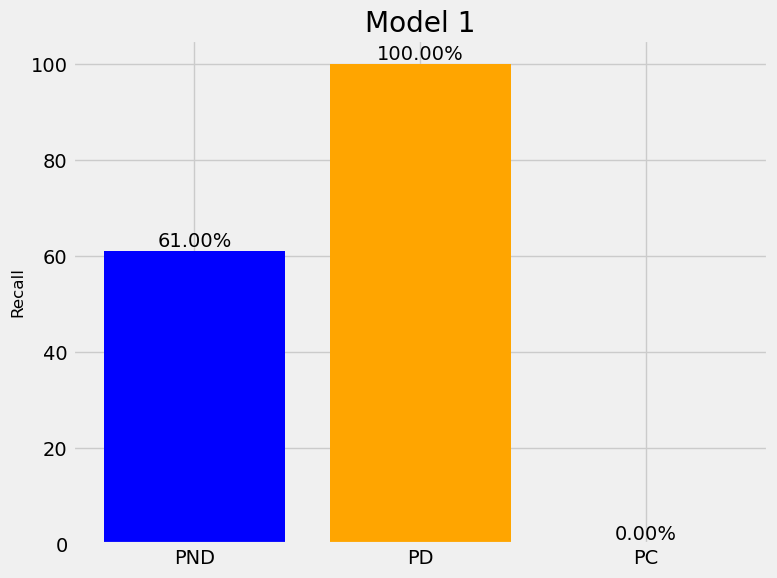

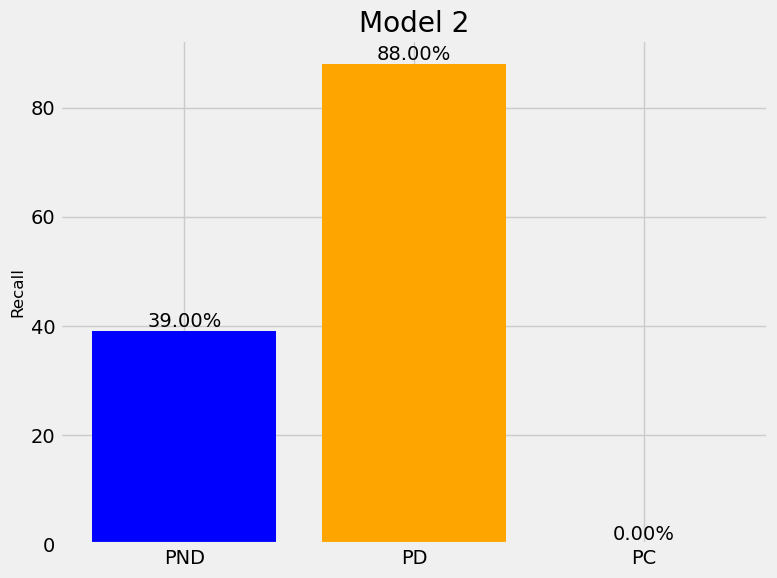

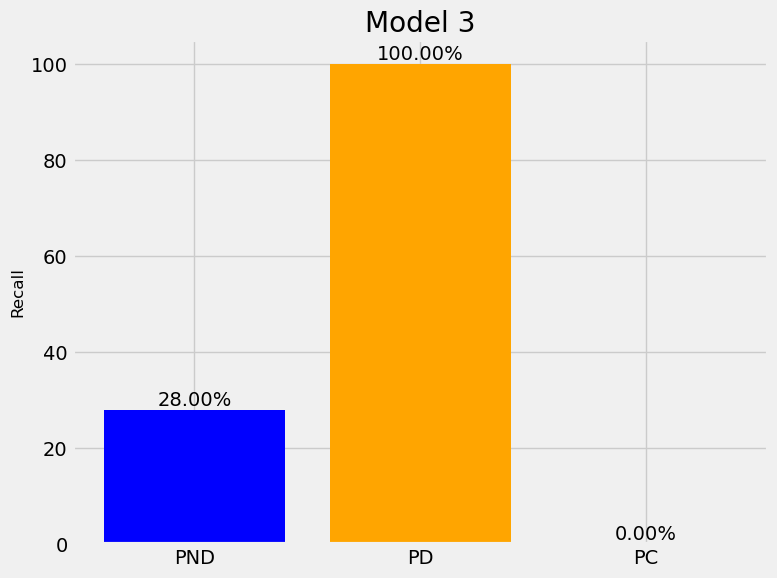

In [ ]:
import matplotlib.pyplot as plt

# Recall values obtained from classification reports
recall_values = [
    {"PND": 61.00, "PD": 100.00, "PC": 0.00},  # Model 1
    {"PND": 39.00, "PD": 88.00, "PC": 0.00},   # Model 2
    {"PND": 28.00, "PD": 100.00, "PC": 0.00}   # Model 3
]

# Class labels and model names
class_labels = ["PND", "PD", "PC"]
model_names = ["Model 1", "Model 2", "Model 3"]

# Plot recall values for each model
for i, recall_data in enumerate(recall_values):
    # Create subplots
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    # Plot recall values for each class
    for j, class_label in enumerate(class_labels):
        recall = recall_data[class_label]
        ax.bar(j, recall, color=['blue', 'orange', 'green'][j])
        ax.text(j, recall + 0.04, f'{recall:.2f}%', ha='center', va='bottom', color='black')

    # Set labels and title
    ax.set_ylabel('Recall', fontweight='normal', fontsize=12)
    ax.set_title(model_names[i])

    # Set x-axis ticks and labels
    plt.xticks(range(len(class_labels)), class_labels)

    # Show plot
    plt.tight_layout()
    plt.show()


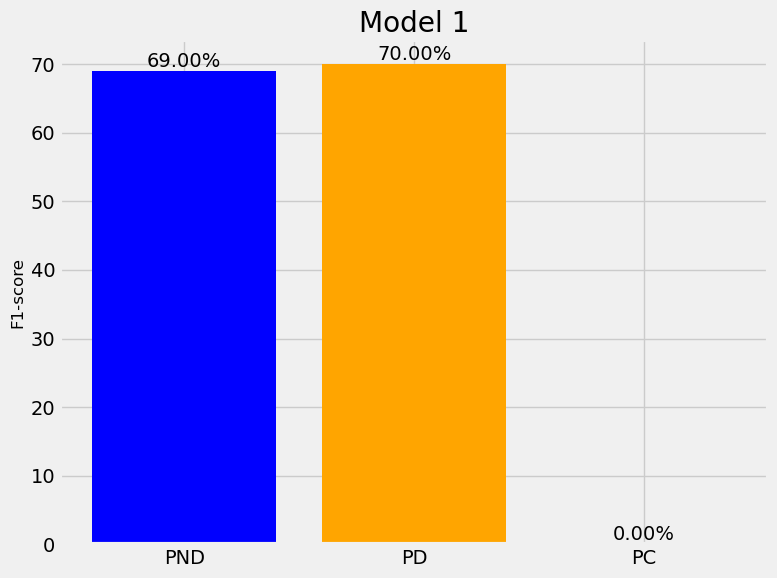

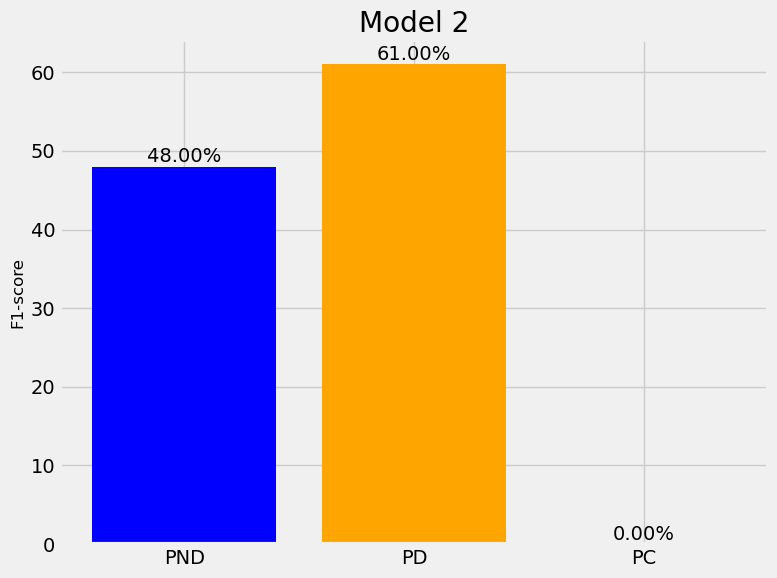

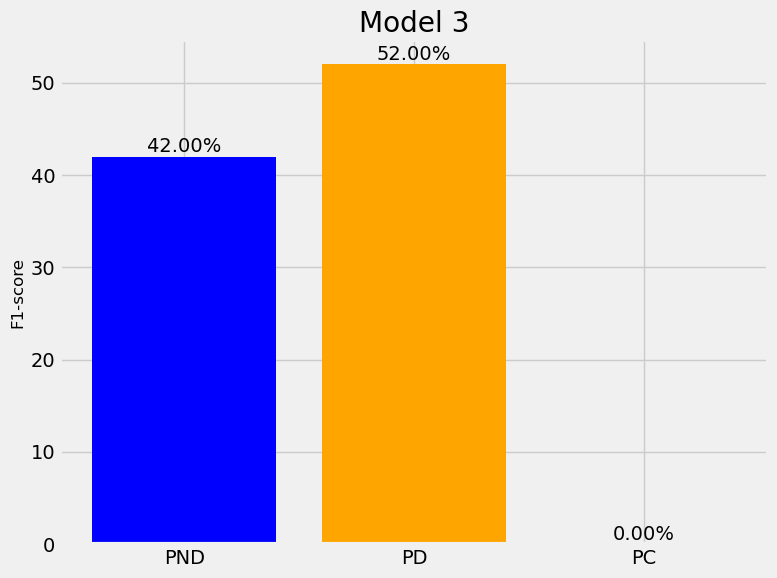

In [ ]:
import matplotlib.pyplot as plt

# F1-score values obtained from classification reports
f1_score_values = [
    {"PND": 69.00, "PD": 70.00, "PC": 0.00},  # Model 1
    {"PND": 48.00, "PD": 61.00, "PC": 0.00},  # Model 2
    {"PND": 42.00, "PD": 52.00, "PC": 0.00}   # Model 3
]

# Class labels and model names
class_labels = ["PND", "PD", "PC"]
model_names = ["Model 1", "Model 2", "Model 3"]

# Plot F1-score values for each model
for i, f1_score_data in enumerate(f1_score_values):
    # Create subplots
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    # Plot F1-score values for each class
    for j, class_label in enumerate(class_labels):
        f1_score = f1_score_data[class_label]
        ax.bar(j, f1_score, color=['blue', 'orange', 'green'][j])
        ax.text(j, f1_score + 0.04, f'{f1_score:.2f}%', ha='center', va='bottom', color='black')

    # Set labels and title
    ax.set_ylabel('F1-score', fontweight='normal', fontsize=12)
    ax.set_title(model_names[i])

    # Set x-axis ticks and labels
    plt.xticks(range(len(class_labels)), class_labels)

    # Show plot
    plt.tight_layout()
    plt.show()


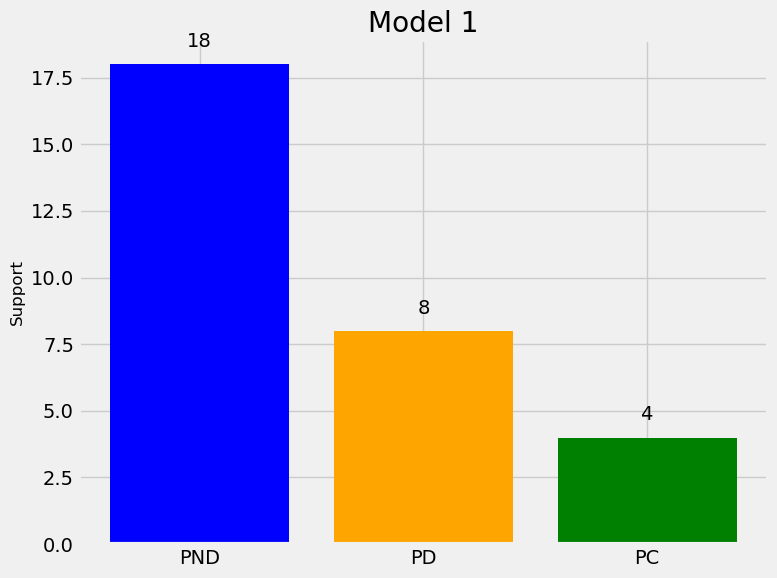

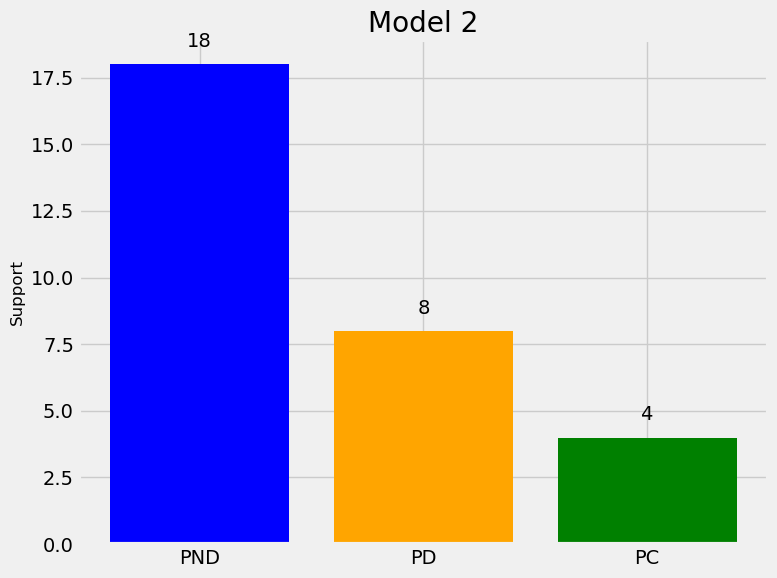

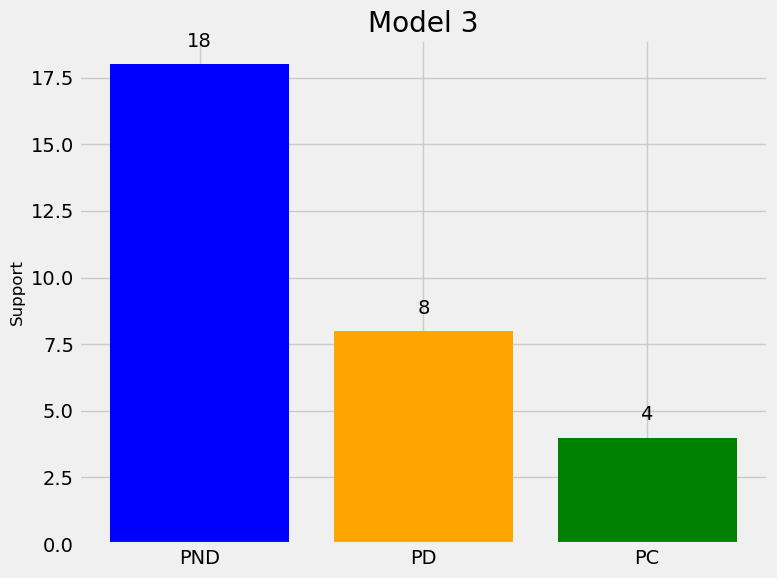

In [ ]:
import matplotlib.pyplot as plt

# Support values obtained from classification reports
support_values = [
    {"PND": 18, "PD": 8, "PC": 4},  # Model 1
    {"PND": 18, "PD": 8, "PC": 4},  # Model 2
    {"PND": 18, "PD": 8, "PC": 4}   # Model 3
]

# Class labels and model names
class_labels = ["PND", "PD", "PC"]
model_names = ["Model 1", "Model 2", "Model 3"]

# Plot support values for each model
for i, support_data in enumerate(support_values):
    # Create subplots
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    # Plot support values for each class
    for j, class_label in enumerate(class_labels):
        support = support_data[class_label]
        ax.bar(j, support, color=['blue', 'orange', 'green'][j])
        ax.text(j, support + 0.5, f'{support}', ha='center', va='bottom', color='black')

    # Set labels and title
    ax.set_ylabel('Support', fontweight='normal', fontsize=12)
    ax.set_title(model_names[i])

    # Set x-axis ticks and labels
    plt.xticks(range(len(class_labels)), class_labels)

    # Show plot
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Extract features (X) and labels (y) from the DataFrame
X = df_numeric.drop(columns=['Group'])
y = df['Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define combinations of RBF and C values
params = [
    {'kernel': 'rbf', 'gamma': 1.0E-4, 'C': 100},
    {'kernel': 'rbf', 'gamma': 1.0E-3, 'C': 100},
    {'kernel': 'rbf', 'gamma': 1.0E-1, 'C': 10}
]

# Train and evaluate SVM models for each parameter combination
svm_models = []  # List to store trained SVM models
predictions = []  # List to store predictions for each model

for i, param in enumerate(params):
    # Create an SVM classifier
    clf = svm.SVC(**param)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Store the trained model
    svm_models.append(clf)

    # Make predictions
    predictions.append(clf.predict(X_test))

# Calculate confusion matrix for each model
conf_matrices = [confusion_matrix(y_test, pred) for pred in predictions]

# Define class labels
class_labels = ['non-demented', 'demented', 'converted']

# Print confusion matrix for each model
for i, conf_matrix in enumerate(conf_matrices):
    print(f"Confusion Matrix for Model {i+1}:")
    print(conf_matrix)
    print()


Confusion Matrix for Model 1:
[[11  6  1]
 [ 0  8  0]
 [ 3  1  0]]

Confusion Matrix for Model 2:
[[7 7 4]
 [1 7 0]
 [3 1 0]]

Confusion Matrix for Model 3:
[[ 5 12  1]
 [ 0  8  0]
 [ 1  3  0]]



In [ ]:
predictions_1 = predictions[0]  # Predictions for Model 1
predictions_2 = predictions[1]  # Predictions for Model 2
predictions_3 = predictions[2]  # Predictions for Model 3


Let's talk about something called a "Confusion Matrix". Don't worry, it's not as confusing as its name sounds!

Imagine you have a test with two types of questions: ones you answer correctly and ones you answer incorrectly.

Here's how the confusion matrix works:

1. **True Positive (TP):** These are the questions you answer correctly. For example, if you correctly identify a picture of a cat as a cat, that's a true positive.

2. **True Negative (TN):** These are the questions you answer incorrectly but should have. For example, if you look at a picture of a dog and say it's a cat (which is wrong), but in reality, the picture is indeed a dog, that's a true negative.

3. **False Positive (FP):** These are the questions you answer incorrectly but should have answered correctly. So, if you look at a picture of a dog and say it's a cat (which is wrong), but in reality, the picture is a cat, that's a false positive.

4. **False Negative (FN):** These are the questions you answer correctly but should have answered incorrectly. For example, if you look at a picture of a cat and say it's a dog (which is wrong), but in reality, the picture is a cat, that's a false negative.

So, the confusion matrix is like a scoreboard showing how you performed in the test. It tells you how many questions you answered correctly, how many you answered incorrectly, and whether these answers should have been correct or incorrect.


1. **Sensitivity**:
   Sensitivity = (TP + FN) / TP
   Where TP represents True Positive (the number of patients correctly identified as having the condition), and FN represents False Negative (the number of patients not identified as having the condition).

2. **Specificity**:
   Specificity = TN / (TN + FP)
   Where TN represents True Negative (the number of healthy individuals correctly identified as not having the condition), and FP represents False Positive (the number of healthy individuals incorrectly identified as having the condition).

3. **Positive Predictive Value (PPV)**:
   PPV = TP / (TP + FP)
   Where TP represents True Positive and FP represents False Positive.


When conducting medical tests, we want to ensure that the tests are accurate. It's like playing a guessing game, but this riddle is about health.

1. **Sensitivity**: This refers to how well the test can find people who truly have the condition. If a person truly has the condition and the test can find them, we say the test is "sensitive." Sensitivity is calculated as True Positives (TP) divided by the sum of True Positives (TP) and False Negatives (FN).

2. **Specificity**: This refers to how well the test can find people who are truly healthy. If a person is truly healthy and the test can find them, we say the test is "specific." Specificity is calculated as True Negatives (TN) divided by the sum of True Negatives (TN) and False Positives (FP).

3. **Positive Predictive Value (PPV)**: This refers to how many truly positive cases are among all the cases that tested positive. PPV is calculated as True Positives (TP) divided by the sum of True Positives (TP) and False Positives (FP).

By understanding these metrics, we can better evaluate how effective a test is.


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import svm

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Extract features (X) and labels (y) from the DataFrame
X = df_numeric.drop(columns=['Group'])
y = df['Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define combinations of RBF and C values
params = [
    {'kernel': 'rbf', 'gamma': 1.0E-4, 'C': 100},
    {'kernel': 'rbf', 'gamma': 1.0E-3, 'C': 100},
    {'kernel': 'rbf', 'gamma': 1.0E-1, 'C': 10}
]

# Train and evaluate SVM models for each parameter combination
for i, param in enumerate(params):
    # Create an SVM classifier
    clf = svm.SVC(**param)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    predictions = clf.predict(X_test)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)

    # Print the metrics for each class in each model
    print(f"Model {i+1} Metrics:")
    for label in range(3):  # Iterate through each class label
        # Map class labels to "non-demented", "demented", "convert"
        if label == 0:
            class_name = "non-demented"
        elif label == 1:
            class_name = "demented"
        else:
            class_name = "convert"

        TP = conf_matrix[label, label]
        FP = np.sum(predictions == label) - TP
        FN = np.sum(y_test == label) - TP
        TN = len(predictions) - (TP + FP + FN)

        # Calculate precision and recall
        precision = precision_score(y_test, predictions, labels=[label], average='macro')
        recall = recall_score(y_test, predictions, labels=[label], average='macro')

        print(f"Class: {class_name}")
        print(f"  True Positives (TP): {TP}")
        print(f"  False Positives (FP): {FP}")
        print(f"  False Negatives (FN): {FN}")
        print(f"  True Negatives (TN): {TN}")
        print(f"  Precision: {precision:.2f}%")
        print(f"  Recall: {recall:.2f}%\n")


Model 1 Metrics:
Class: non-demented
  True Positives (TP): 11
  False Positives (FP): 3
  False Negatives (FN): 7
  True Negatives (TN): 9
  Precision: 0.79%
  Recall: 0.61%

Class: demented
  True Positives (TP): 8
  False Positives (FP): 7
  False Negatives (FN): 0
  True Negatives (TN): 15
  Precision: 0.53%
  Recall: 1.00%

Class: convert
  True Positives (TP): 0
  False Positives (FP): 1
  False Negatives (FN): 4
  True Negatives (TN): 25
  Precision: 0.00%
  Recall: 0.00%

Model 2 Metrics:
Class: non-demented
  True Positives (TP): 7
  False Positives (FP): 4
  False Negatives (FN): 11
  True Negatives (TN): 8
  Precision: 0.64%
  Recall: 0.39%

Class: demented
  True Positives (TP): 7
  False Positives (FP): 8
  False Negatives (FN): 1
  True Negatives (TN): 14
  Precision: 0.47%
  Recall: 0.88%

Class: convert
  True Positives (TP): 0
  False Positives (FP): 4
  False Negatives (FN): 4
  True Negatives (TN): 22
  Precision: 0.00%
  Recall: 0.00%

Model 3 Metrics:
Class: non-de

1. **Precision:**
   Precision is the proportion of true positive samples among all samples predicted as positive by the model. In other words, it measures the accuracy of the model in correctly predicting positives. Precision can be calculated using the following formula:

   Precision = True Positives / (True Positives + False Positives)

2. **Recall:**
   Recall, also known as sensitivity, is the proportion of true positive samples correctly identified by the model among all true positive samples. In other words, it measures how successful the model is in finding true positives. Recall can be calculated using the following formula:

   Recall = True Positives / (True Positives + False Negatives)

3. **F1-score:**
   The F1-score is the harmonic mean of precision and recall. It provides a single measure of overall model performance, considering the balance between precision and recall. F1-score is particularly useful when both precision and recall are important. It can be calculated using the following formula:

   F1-score = 2 * (Precision * Recall) / (Precision + Recall)

4. **Support:**
   Support refers to the number of true samples for each class. It is typically expressed in terms of sample counts.
   Support = Sample Count


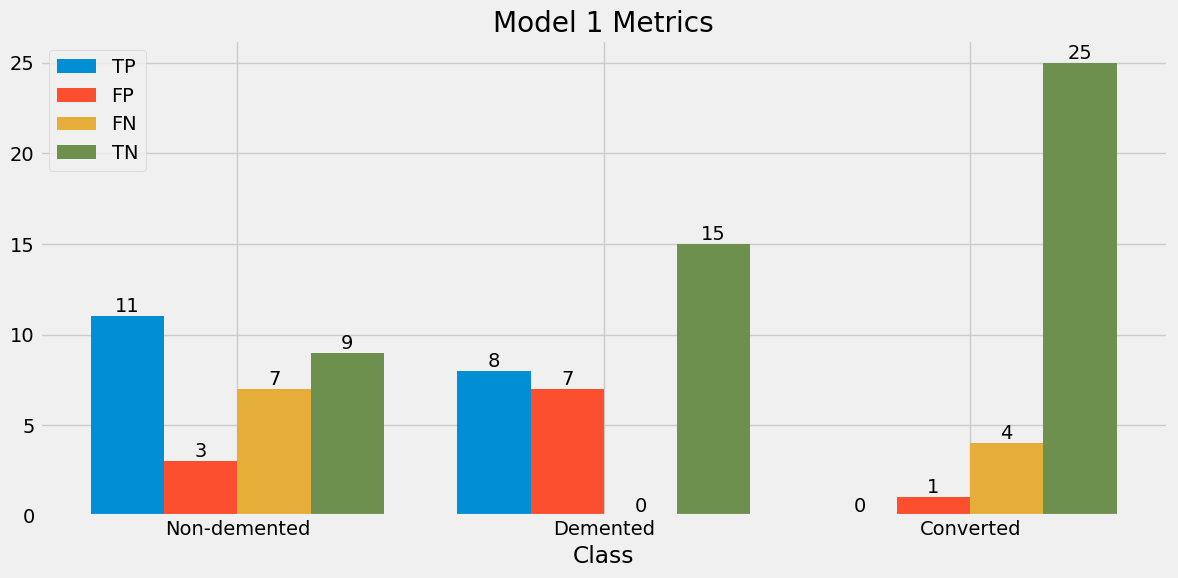

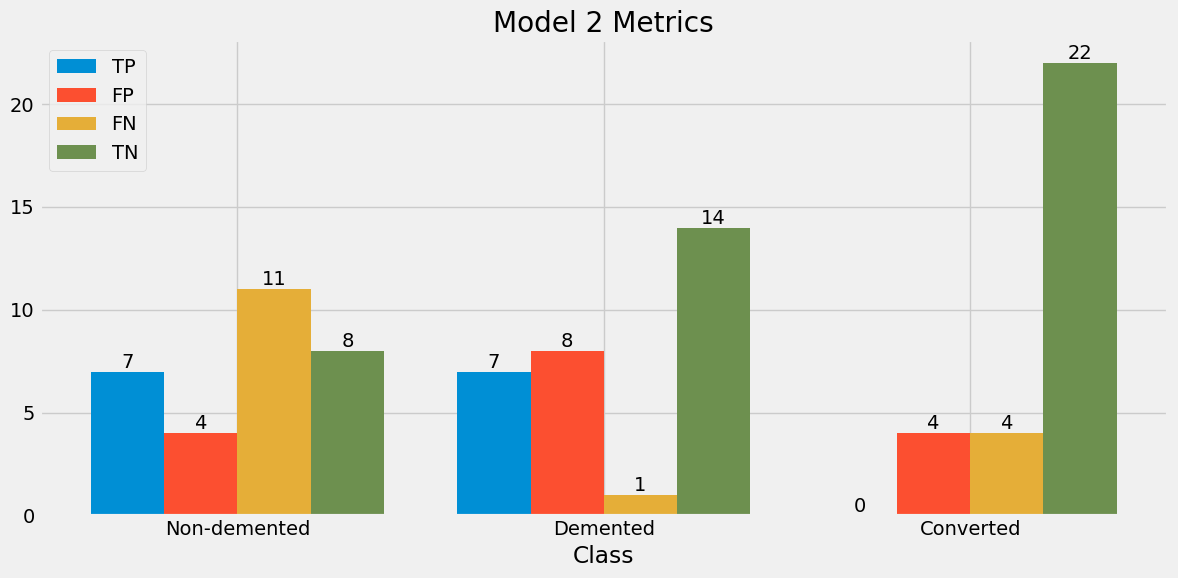

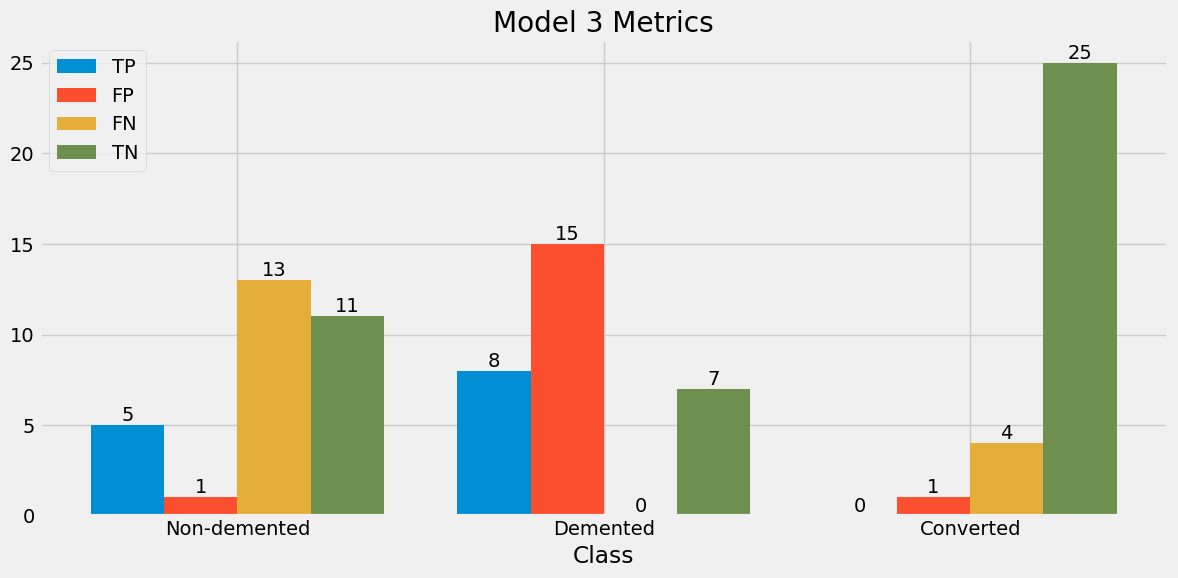

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt

# Assuming you have the data stored in variables df, df_numeric, X_train, X_test, y_train, y_test
# Assuming you have trained SVM models stored in svm_models

# Initialize an empty list to store predictions for each model
predictions = []

# Train and evaluate SVM models for each parameter combination
for clf in svm_models:
    # Make predictions
    pred = clf.predict(X_test)
    # Append predictions to the list
    predictions.append(pred)

# Define class labels
class_labels = ["Non-demented", "Demented", "Converted"]

# Calculate confusion matrix for each model
conf_matrices = [confusion_matrix(y_test, pred) for pred in predictions]

# Define metrics names
metrics_names = ["TP", "FP", "FN", "TN"]

# Plotting
num_models = len(svm_models)

# Plot each model one by one
for i, (conf_matrix, pred) in enumerate(zip(conf_matrices, predictions)):
    # Create a new figure for each model
    fig, ax = plt.subplots(figsize=(12, 6))

    # Calculate metrics for each class
    metrics = np.zeros((len(class_labels), 4))
    for j, label in enumerate(range(len(class_labels))):
        TP = conf_matrix[label, label]
        FP = np.sum(pred == label) - TP
        FN = np.sum(y_test == label) - TP
        TN = len(pred) - (TP + FP + FN)
        metrics[j] = [TP, FP, FN, TN]

    # Set the title based on the number of models
    if i == 0:  # For the first model
        ax.set_title("Model 1 Metrics")  # Set the title for Model 1
    elif i == 1:  # For the second model
        ax.set_title(f"Model {i+1} Metrics")  # Set the title for Model 2
    else:  # For subsequent models
        ax.set_title(f"Model {i+1} Metrics")  # Set the title for other models

    barWidth = 0.2  # Width of each bar
    positions = np.arange(len(class_labels))  # Positions for the bars
    # Plot each metric for each class
    for j, metric in enumerate(metrics.T):
        ax.bar(positions + j * barWidth, metric, width=barWidth, label=metrics_names[j])

    # Set x-axis label, tick positions, and tick labels
    ax.set_xlabel("Class")
    ax.set_xticks(positions + barWidth * 1.5)
    ax.set_xticklabels(class_labels)
    ax.legend()

    # Annotate values on top of bars
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f"{int(height)}", (rect.get_x() + rect.get_width() / 2, height),
                    ha="center", va="bottom")

    plt.tight_layout()
    plt.show()


In [ ]:
import warnings
warnings.resetwarnings()

[Tableau Visualization](https://public.tableau.com/app/profile/.11073732/viz/oasis_longitudinal_demographics/Test#1)